# [5] Assignment 3: KNN

<ol>
    <li><strong>Apply Knn(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Apply Knn(kd tree version) on these feature sets</strong>
        <br><font color='red'>NOTE: </font>sklearn implementation of kd-tree accepts only dense matrices, you need to convert the sparse matrices of CountVectorizer/TfidfVectorizer into dense matices. You can convert sparse matrices to dense using .toarray() attribute. For more information please visit this <a href='https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.sparse.csr_matrix.toarray.html'>link</a>
        <ul>
            <li><font color='red'>SET 5:</font>Review text, preprocessed one converted into vectors using (BOW) but with restriction on maximum features generated.
            <pre>
            count_vect = CountVectorizer(min_df=10, max_features=500) 
            count_vect.fit(preprocessed_reviews)
            </pre>
            </li>
            <li><font color='red'>SET 6:</font>Review text, preprocessed one converted into vectors using (TFIDF) but with restriction on maximum features generated.
            <pre>
                tf_idf_vect = TfidfVectorizer(min_df=10, max_features=500)
                tf_idf_vect.fit(preprocessed_reviews)
            </pre>
            </li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best K)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

### For reference i followed few posts and blogs which would to mention below in reference section

### Reference:

https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/

https://www.kaggle.com/jitendras/knn-amazon-fine-food-reviews-data-set

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

# Precprocessing of Review Text
#####Prateek Saurabh (Just for identification)

In [10]:
#SaurabhP (just for identification)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
con = sqlite3.connect(r"D:\AppliedAI\AAIC_Course_handouts\11_Amazon Fine Food Reviews\amazon-fine-food-reviews\database.sqlite")
data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3""",con)

# Change Score with 1 n 2 as -ve and 4 n 5 as +ve

def chng_to_0_or_1 (Score):
    if Score ==4 or Score ==5:
        return 1
    elif Score ==1 or Score ==2:
        return 0
    else:# Thus in case by some mistake any data is their with rating 6 or 7 etc due to some error is removed
        pass
currentScore = data["Score"]
new_Score = currentScore.map(chng_to_0_or_1)
data["Score"] = new_Score
print ("Number of data points available")
print (data.shape)#Gives original number of data points available


#2 Data Cleaning a.) Getting rid of duplicates and b.) if helpnessdenominator < helpfulnessnumerator


data = data.drop_duplicates(subset = ["UserId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Score","Time","Summary","Text"], keep='first', inplace=False)
print ("Number of data points after removing duplicates")
print (data.shape)#Gives data points are deduplication

# Reference: Copied from above cell  final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
data=data[data.HelpfulnessNumerator<=data.HelpfulnessDenominator]
print ("Number of data points after removing where HelpfulnessNumerator is more than HelpfulnessDenominator ")
print (data.shape)

#3 Preprocessing begins

#Convert to lower case,convert shortcut words to proper words, remove Special Character

#i) Convert to lower case:
data["Text"] =  (data["Text"].str.lower())

#ii) Convert Shortcuts words to proper words
#List of Words are:https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions
#Reference:https://stackoverflow.com/questions/39602824/pandas-replace-string-with-another-string
data['Summary'] = data['Summary'].replace({"ain't":"am not","amn't":"am not","aren't":"are not", \
"can't":"cannot","cause":"because","could've":"could have","couldn't":"could not","couldn't've":"could not have", \
"daren't":"dare not","daresn't":"dare not","dasn't":"dare not","didn't":"did not","doesn't":"does not", \
"don't":"do not","e'er":"ever","everyone's":"everyone is","finna":"fixing to","gimme":"give me", \
"gonna":"going to","gon't":"go not","gotta":"got to","hadn't":"had not","hasn't":"has not","haven't":"have not",\
"he'd":"he had","he'll":"he shall","he's":"he has","he've":"he have","how'd":"how did","how'll":"how will",\
"how're":"how are","how's":"how has","I'd":"I had","I'll":"I shall","I'm":"I am","I'm'a":"I am about to",\
"I'm'o":"I am going to","I've":"I have","isn't":"is not","it'd":"it would","it'll":"it shall","it's":"it has",\
"let's":"let us","mayn't":"may not","may've":"may have","mightn't":"might not","might've":"might have",\
"mustn't":"must not","mustn't've":"must not have","must've":"must have","needn't":"need not","ne'er":"never",\
"o'clock":"of the clock","o'er":"","ol'":"old","oughtn't":"ought not","shalln't":"shall not","shan't":"shall not",\
"she'd":"she had","she'll":"she shall","she's":"she is","should've":"should have","shouldn't":"should not",\
"shouldn't've":"should not have","somebody's":"somebody has","someone's":"someone has","something's":"something has",\
"that'll":"that will","that're":"that are","that's":"that is","that'd":"that would","there'd":"there had",\
"there'll":"there shall","there're":"there are","there's":"there is","these're":"hese are","they'd":"they had",\
"they'll":"they will","they're":"they are","they've":"they have","this's":"","those're":"those are","tis":"it is",\
"twas":"it was","wasn't":"was not","we'd":"we had","we'd've":"we would have","we'll":"we will","we're":"we are",\
"we've":"we have","weren't":"were not","what'd":"what did","what'll":"what will","what're":"what are","what's":"what is",\
"what've":"what have","when's":"when is","where'd":"where did","where're":"where are","where've":"where have",\
"which's":"which has","who'd":"who would","who'd've":"who would have","who'll":"who shall","who're":"who are",\
"who's":"who has","who've":"who have","why'd":"why did","why're":"why are","why's":"why has","won't":"will not",\
"would've":"would have","wouldn't":"would not","y'all":"you all","you'd":"you had","you'll":"you shall","you're":"you are",\
"you've":"you have"})
# iii) Remove Special Characters except alpahbets and numbers
#The reason i dont want to remove number people might write got five eggs as 5 eggs or vice versa and dont want to lose 
#that information which could be useful
#Ref:https://stackoverflow.com/questions/33257344/how-to-remove-special-characers-from-a-column-of-dataframe-using-module-re
data["Text"]=data["Text"].map(lambda x: re.sub(r'[^a-zA-Z_0-9 -]', '', x))
#The Summary are usually so small if we remove few stopwords the meaning itself would be complely lost or chamge
# So let us see what all stopwords we have
stopwords =(stopwords.words("english"))
#  iv) For now let us just go with flow will use default stopwords as creating our own stop words is very time consuming
#Rather will use n-gram stratergy to get rid of problem of stopwords removal changing the meaning of sentences
#Ref:https://stackoverflow.com/questions/43184364/python-remove-stop-words-from-pandas-dataframe-give-wrong-output
data["New_Text"]= data['Text'].apply(lambda x: [item for item in str.split(x) if item not in stopwords])
#Ref:https://stackoverflow.com/questions/37347725/converting-a-panda-df-list-into-a-string/37347837
#we are creating new column New_summary so in case in future we need summary it is intact
data["New_Text"]=data["New_Text"].apply(' '.join)
#print ("~~~~~~~~~~~~~~~~~~~~~~~~~After removing stop words~~~~~~~~~~~~~~~~~~~~~")
#print (data["New_Text"])
#print (data.shape)

# v) Now lets do Stemming
#https://stackoverflow.com/questions/48617589/beginner-stemming-in-pandas-produces-letters-not-stems
english_stemmer=SnowballStemmer('english', ignore_stopwords=True)
data["New_Text"] = data["New_Text"].apply(english_stemmer.stem)
data["New_Text"] = data["New_Text"].astype(str)
#print (data.shape)
#print ("~~~~~~~~~~~~~~~~~~~~~~~~~After Stemming n removing stop words~~~~~~~~~~~~~~~~~~~~~")
#print (data["New_Text"] )
#vi) stemming without removing stop words
english_stemmer=SnowballStemmer('english', ignore_stopwords=True)
#https://stackoverflow.com/questions/34724246/attributeerror-float-object-has-no-attribute-lower
data["Text_with_stop"]=data["Text"].astype(str)
data["Text_with_stop"]=data["Text_with_stop"].str.lower().map(english_stemmer.stem)
data["Text_with_stop"]=data["Text_with_stop"].apply(''.join)
data["Text_with_stop"] = data["Text_with_stop"].astype(str)
print(data["Score"].value_counts())
print ("Thus we see there are 85% and 15% positive and negative reviews,thus a unbalanced dataset.So to create a balanced \
dataset we first copy negative dataset 6 times than we sample with same number of times as positive")
data_neg = data[data["Score"] == 0]
data_pos = data[data["Score"] == 1]
data = pd.concat([data_pos,data_neg])
data["Time_formatted"]= pd.to_datetime(data["Time"])
data.sort_values(by=['Time_formatted'], inplace=True)
print(data["Score"].value_counts())


Number of data points available
(525814, 10)
Number of data points after removing duplicates
(366392, 10)
Number of data points after removing where HelpfulnessNumerator is more than HelpfulnessDenominator 
(366390, 10)
1    308679
0     57711
Name: Score, dtype: int64
Thus we see there are 85% and 15% positive and negative reviews,thus a unbalanced dataset.So to create a balanced dataset we first copy negative dataset 6 times than we sample with same number of times as positive
1    308679
0     57711
Name: Score, dtype: int64


In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

Y = data['Score'].values
X_with_stop= data['Text_with_stop'].values
X_no_stop = data['New_Text'].values


X_with_stop_train, X_with_stop_test, y_train, y_test = train_test_split(X_with_stop, Y, test_size=0.33, shuffle=False)
X_with_stop_train, X_with_stop_CV, y_train, y_CV = train_test_split(X_with_stop_train, y_train, test_size=0.33, shuffle=False)

print ("The shape of X Train, X CV, X Test, Y Train, Y CV and Y Test respectively are")
print(X_with_stop_train.shape, X_with_stop_CV.shape,X_with_stop_test.shape,y_train.shape,y_CV.shape,y_test.shape) 

The shape of X Train, X CV, X Test, Y Train, Y CV and Y Test respectively are
(164472,) (81009,) (120909,) (164472,) (81009,) (120909,)


## [5.1] Applying KNN brute force

### [5.1.1] Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [12]:
#SaurabhP (just for identification)

# SET 1:Review text, preprocessed one converted into vectors using (BOW)
   
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_X_train_brute = vectorizer.fit_transform(X_with_stop_train)
bow_X_test_brute = vectorizer.transform(X_with_stop_test)
bow_X_CV_brute = vectorizer.transform(X_with_stop_CV)

print (bow_X_train_brute.shape[0]);print (y_train.shape[0])
print (bow_X_CV_brute.shape[0]);print (y_CV.shape[0])

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# creating odd list of K for KNN
neighbors = list(range(3,30,2))

164472
164472
81009
81009


In [ ]:
auc_cv = []
auc_train=[]
y_train_pred = []
y_cv_pred =[]

for k in tqdm(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    knn.fit(bow_X_train_brute, y_train)
    print ("the value of k is "+str(k))
    for a in tqdm(range(0, bow_X_train_brute.shape[0], 1000)):
        print ("The length of y_train "+str(len(y_train)))
        print ("The length of y_train_pred before extension"+str(len(y_train_pred)))
        y_train_pred.extend(knn.predict_proba(bow_X_train_brute[a:a+1000])[:,1])
        print ("The length of y_train_pred after extension"+str(len(y_train_pred)))
        print ("the value of k is "+str(k))
    print ("The length of y_train_pred final"+str(len(y_train_pred)))
    print ("The length of y_train final"+str(len(y_train)))
    if (len(y_train))== (len(y_train_pred)):
        auc_train.append(roc_auc_score(y_train,y_train_pred))
        y_train_pred = []       
    for b in tqdm(range(0, bow_X_CV_brute.shape[0], 1000)):
        print ("The length of y_CV "+str(len(y_CV)))
        print ("The length of y_cv_pred before extension"+str(len(y_cv_pred)))
        y_cv_pred.extend(knn.predict_proba(bow_X_CV_brute[b:b+1000])[:,1])
        print ("The length of y_cv_pred after extension"+str(len(y_cv_pred)))
        print ("the value of k is "+str(k))
    print (len(y_CV))
    print (len(y_cv_pred))
    if (len(y_CV))== (len(y_cv_pred)):
        auc_cv.append(roc_auc_score(y_CV, y_cv_pred))
        y_cv_pred =[]



In [ ]:
neighbors1 = list(range(51,150,6))
auc_cv1 = []
auc_train1=[]
y_train_pred1 = []
y_cv_pred1 =[]

for k1 in tqdm(neighbors1):
    knn1 = KNeighborsClassifier(n_neighbors=k1,algorithm='brute')
    knn1.fit(bow_X_train_brute, y_train)
    print ("the value of k1 is "+str(k1))
    for a in tqdm(range(0, bow_X_train_brute.shape[0], 1000)):
        y_train_pred1.extend(knn1.predict_proba(bow_X_train_brute[a:a+1000])[:,1])
    print ("The length of y_train_pred final"+str(len(y_train_pred)))
    print ("The length of y_train final"+str(len(y_train)))
    if (len(y_train))== (len(y_train_pred1)):
        auc_train1.append(roc_auc_score(y_train,y_train_pred1))
        y_train_pred1 = []       
    for b in tqdm(range(0, bow_X_CV_brute.shape[0], 1000)):
        y_cv_pred1.extend(knn.predict_proba(bow_X_CV_brute[b:b+1000])[:,1])
    print (len(y_CV))
    print (len(y_cv_pred1))
    if (len(y_CV))== (len(y_cv_pred1)):
        auc_cv1.append(roc_auc_score(y_CV, y_cv_pred1))
        y_cv_pred1 =[]

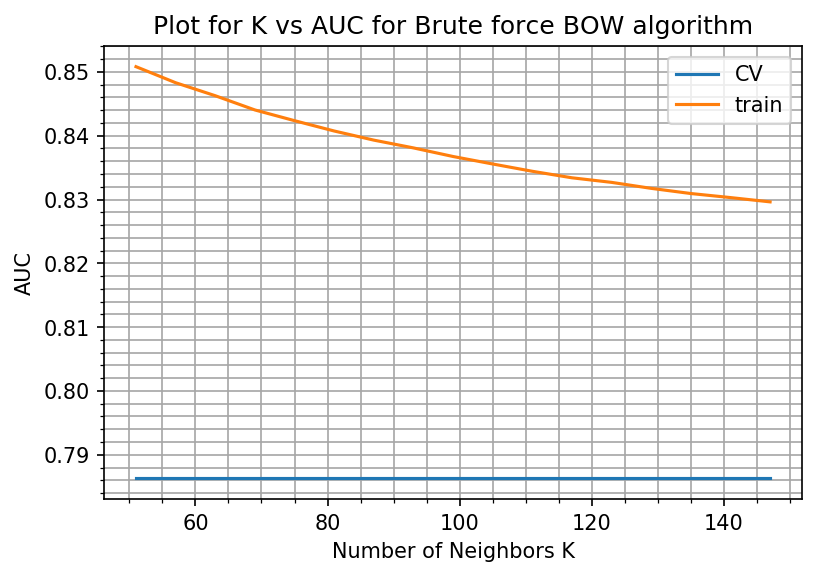

In [224]:
# plot AUC vs K
plt.plot(neighbors1, auc_cv1, label = 'CV')
plt.plot(neighbors1,auc_train1, label = 'Train' )
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for Brute force BOW algorithm")
plt.legend(['CV', 'train'], loc='upper right')
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.show()

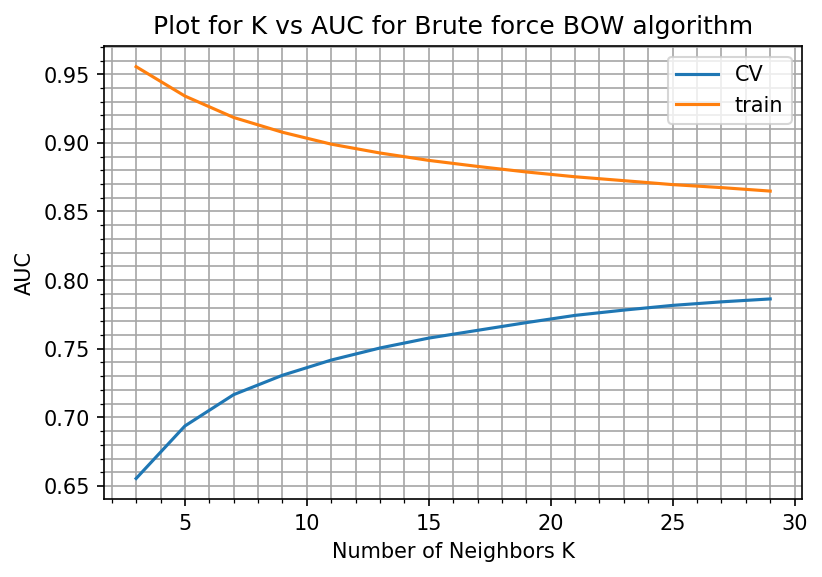

In [225]:
# plot AUC vs K
plt.plot(neighbors, auc_cv, label = 'CV')
plt.plot(neighbors,auc_train, label = 'Train' )
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for Brute force BOW algorithm")
plt.legend(['CV', 'train'], loc='upper right')
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.show()


In [19]:
neighbors_final = []
auc_cv_final = []
auc_train_final = []
neighbors_final.extend(neighbors)
neighbors_final.extend(neighbors1)
print (len(neighbors_final))
auc_cv_final.extend(auc_cv)
auc_cv_final.extend(auc_cv1)
print (len(auc_cv_final))
auc_train_final.extend(auc_train)
auc_train_final.extend(auc_train1)
print (len(auc_train_final))

31
31
31


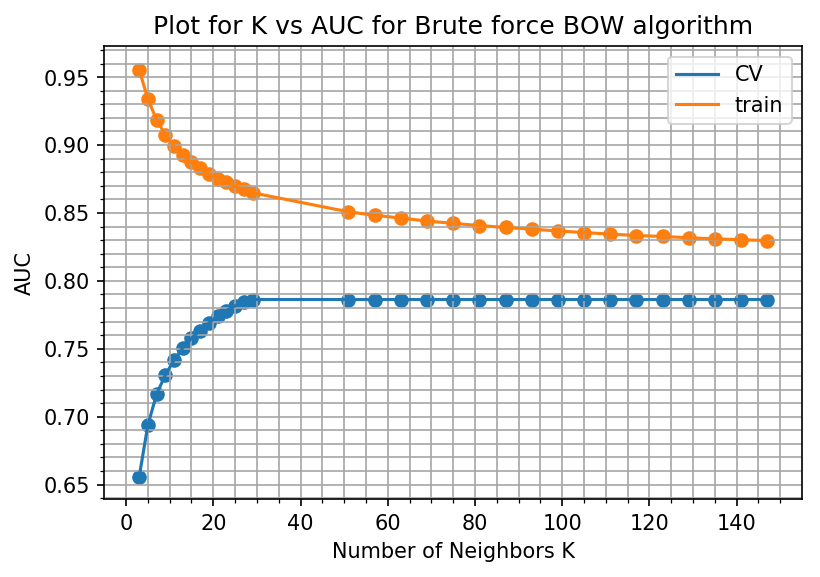

In [226]:
# plot AUC vs K
plt.plot(neighbors_final, auc_cv_final, label = 'CV')
plt.scatter(neighbors_final, auc_cv_final, label = 'CV')
plt.plot(neighbors_final,auc_train_final, label = 'Train' )
plt.scatter(neighbors_final,auc_train_final, label = 'Train' )
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for Brute force BOW algorithm")
plt.legend(['CV', 'train'], loc='upper right')
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.show()

From the graph we can easily interpret after K value of 30 the AUC for CV data doesnt show any improvement but Train AUC is dropping. Thus best we is "27"

In [ ]:
y_train_pred_final_bow_with_optimal_k = []
y_test_pred_final_bow_with_optimal_k = []
auc_train_bow_optimal_k = []
auc_test_bow_optimal_k = []

knn_bow_brute = KNeighborsClassifier(n_neighbors=27,algorithm='brute')
knn_bow_brute.fit(bow_X_train_brute, y_train)
for a in tqdm(range(0, bow_X_train_brute.shape[0], 500)):
    y_train_pred_final_bow_with_optimal_k.extend(knn.predict_proba(bow_X_train_brute[a:a+500])[:,1])
auc_train_bow_optimal_k.append(roc_auc_score(y_train,y_train_pred_final_bow_with_optimal_k))
for b in tqdm(range(0, bow_X_test_brute.shape[0], 500)):
    y_test_pred_final_bow_with_optimal_k.extend(knn.predict_proba(bow_X_test_brute[b:b+500])[:,1])
auc_test_bow_optimal_k.append(roc_auc_score(y_test,y_test_pred_final_bow_with_optimal_k))


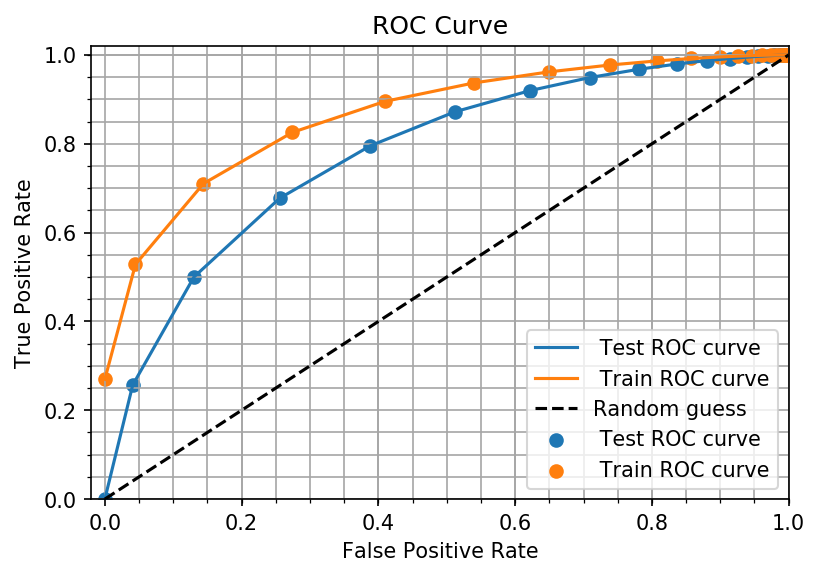

In [229]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred_final_bow_with_optimal_k)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred_final_bow_with_optimal_k)

# create plot
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.plot(fpr_test, tpr_test, label=' Test ROC curve')
plt.scatter(fpr_test, tpr_test, label=' Test ROC curve')
plt.plot(fpr_train, tpr_train, label=' Train ROC curve')
plt.scatter(fpr_train, tpr_train, label=' Train ROC curve')
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [ ]:
y_train_pred_final_bow_with_optimal_k_predict = []
y_test_pred_final_bow_with_optimal_k_predict = []
auc_train_bow_optimal_k_predict = []
auc_test_bow_optimal_k_predict = []

knn_bow_brute = KNeighborsClassifier(n_neighbors=27,algorithm='brute')
knn_bow_brute.fit(bow_X_train_brute, y_train)
for a in tqdm(range(0, bow_X_train_brute.shape[0], 500)):
    y_train_pred_final_bow_with_optimal_k_predict.extend(knn_bow_brute.predict(bow_X_train_brute[a:a+500]))
auc_train_bow_optimal_k_predict.append(roc_auc_score(y_train,y_train_pred_final_bow_with_optimal_k_predict))
for b in tqdm(range(0, bow_X_test_brute.shape[0], 500)):
    y_test_pred_final_bow_with_optimal_k_predict.extend(knn_bow_brute.predict(bow_X_test_brute[b:b+500]))
auc_test_bow_optimal_k_predict.append(roc_auc_score(y_test,y_test_pred_final_bow_with_optimal_k_predict))

In [261]:
from sklearn.metrics import classification_report

print ("#######################################################")
print ("The classification report on Test dataset")
print ("#######################################################")

print(classification_report(y_test, y_test_pred_final_bow_with_optimal_k_predict))


print ("#######################################################")
print ("The classification report on Training dataset")
print ("#######################################################")
print (classification_report(y_train, y_train_pred_final_bow_with_optimal_k_predict))

#######################################################
The classification report on Test dataset
#######################################################
             precision    recall  f1-score   support

          0       0.81      0.02      0.04     21261
          1       0.83      1.00      0.91     99648

avg / total       0.82      0.83      0.75    120909

#######################################################
The classification report on Training dataset
#######################################################
             precision    recall  f1-score   support

          0       0.91      0.03      0.06     22681
          1       0.87      1.00      0.93    141791

avg / total       0.87      0.87      0.81    164472



In [264]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, y_test_pred_final_bow_with_optimal_k_predict))
print (accuracy_score(y_train, y_train_pred_final_bow_with_optimal_k_predict))

0.8272006219553548
0.8656853446179289


The confusion matrix for Train Data for BOW using brute force algorithm


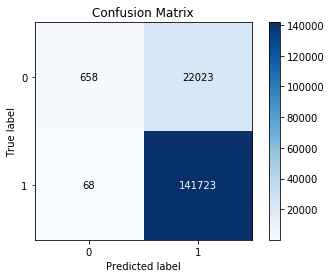

In [46]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

print ("The confusion matrix for Train Data for BOW using brute force algorithm")
skplt.plot_confusion_matrix(y_train,y_train_pred_final_bow_with_optimal_k_predict)

The confusion matrix for Test Data for BOW using brute force algorithm


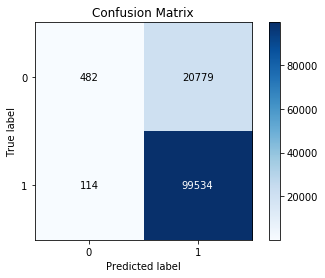

In [47]:
print ("The confusion matrix for Test Data for BOW using brute force algorithm")

skplt.plot_confusion_matrix(y_test,y_test_pred_final_bow_with_optimal_k_predict)


### [5.1.2] Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
tfidf_X_with_stop_train = tf_idf_vect.fit_transform(X_with_stop_train)
tfidf_X_with_stop_test = tf_idf_vect.transform(X_with_stop_test)
tfidf_X_with_stop_CV = tf_idf_vect.transform(X_with_stop_CV)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# creating odd list of K for KNN
neighbors_tfidf_brute = list(range(3,100,10))

# empty list that will hold auc scores
auc_cv_tfidf_brute = []
auc_train_tfidf_brute =[]
y_train_pred_tfidf_brute = []
y_cv_pred_tfidf_brute =[]

for k in tqdm(neighbors_tfidf_brute):
    knn_brute_tfidf = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    knn_brute_tfidf.fit(tfidf_X_with_stop_train, y_train)
    for a in (range(0,tfidf_X_with_stop_train.shape[0],1000)):
        y_train_pred_tfidf_brute.extend(knn_brute_tfidf.predict_proba(tfidf_X_with_stop_train[a:a+1000])[:,1])
    if (len(y_train))== (len(y_train_pred_tfidf_brute)):   
        auc_train_tfidf_brute.append(roc_auc_score(y_train, y_train_pred_tfidf_brute))
        y_train_pred_tfidf_brute = []
    for b in (range(0, tfidf_X_with_stop_CV.shape[0], 1000)):
        y_cv_pred_tfidf_brute.extend(knn_brute_tfidf.predict_proba(tfidf_X_with_stop_CV[b:b+1000])[:,1])
    if (len(y_CV))== (len(y_cv_pred_tfidf_brute)):
        auc_cv_tfidf_brute.append(roc_auc_score(y_CV, y_cv_pred_tfidf_brute))
        y_cv_pred_tfidf_brute =[]

In [ ]:
from sklearn.metrics import roc_auc_score

auc_cv_tfidf_brute = []
y_cv_pred_tfidf_brute =[]

tfidf_X_with_stop_CV = tf_idf_vect.transform(X_with_stop_CV)
for k in tqdm(neighbors_tfidf_brute):
    for b in tqdm(range(0, tfidf_X_with_stop_CV.shape[0], 1000)):
        print ("The value of K is "  + str(k))
        print ("The value of y_cv_pred_tfidf_brute before extension is "+ str(len(y_cv_pred_tfidf_brute)))
        y_cv_pred_tfidf_brute.extend(knn_brute_tfidf.predict_proba(tfidf_X_with_stop_CV[b:b+1000])[:,1])
        print ("The value of y_cv_pred_tfidf_brute after extension is "+ str(len(y_cv_pred_tfidf_brute)))
    if (len(y_CV))== (len(y_cv_pred_tfidf_brute)):
        print ("The value of auc_cv_tfidf_brute before extension is "+ str(len(auc_cv_tfidf_brute)))
        auc_cv_tfidf_brute.append(roc_auc_score(y_CV, y_cv_pred_tfidf_brute))
        print ("The value of auc_cv_tfidf_brute after extension is "+ str(len(auc_cv_tfidf_brute)))
        y_cv_pred_tfidf_brute =[]

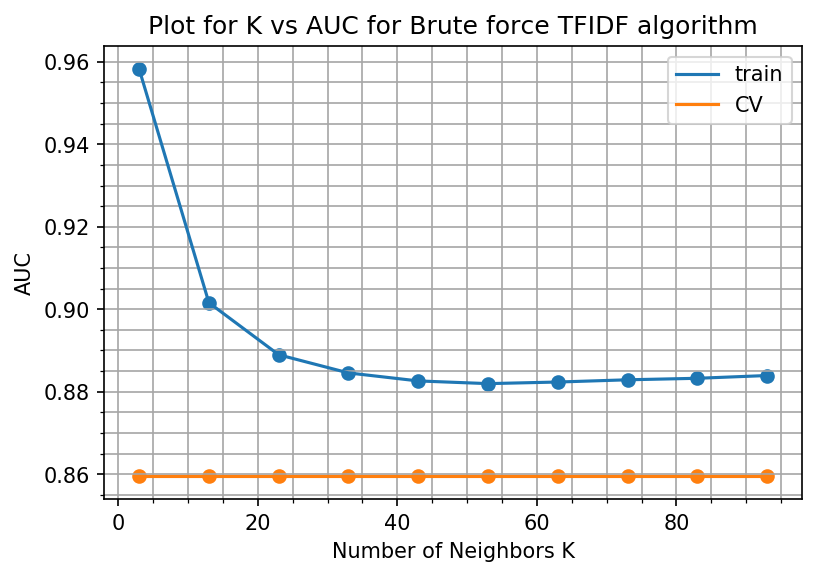

In [230]:
# plot AUC vs k
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.plot(neighbors_tfidf_brute, auc_train_tfidf_brute)
plt.scatter(neighbors_tfidf_brute, auc_train_tfidf_brute)
plt.plot(neighbors_tfidf_brute, auc_cv_tfidf_brute)
plt.scatter(neighbors_tfidf_brute, auc_cv_tfidf_brute)
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for Brute force TFIDF algorithm")
plt.legend(['train', 'CV'], loc='upper right')
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.show()

So from the above cell it is clear when k is 53 then AUC is 0.8826070571971067. When K is 63 it becomes 0.8819540722691654 and when K is 73 is shoots a bit to 0.8823427871009598.
So best value of K should be between 63 and 73.So let us take as 63

In [ ]:
optimal_k = 63
y_train_final_tfidf_with_optimal_k = []
y_test_final_tfidf_with_optimal_k = []
auc_train_tfidf_optimal_k = []
auc_test_tfidf_optimal_k = []

bestknn_brute_tfidf = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute')
bestknn_brute_tfidf.fit(tfidf_X_with_stop_train, y_train)
for a in tqdm(range(0,tfidf_X_with_stop_train.shape[0],1000)):
    y_train_final_tfidf_with_optimal_k.extend(bestknn_brute_tfidf.predict_proba(tfidf_X_with_stop_train[a:a+1000])[:,1])
auc_train_tfidf_optimal_k.append(roc_auc_score(y_train,y_train_final_tfidf_with_optimal_k))
for b in tqdm(range(0, tfidf_X_with_stop_test.shape[0], 800)):
    y_test_final_tfidf_with_optimal_k.extend(bestknn_brute_tfidf.predict_proba(tfidf_X_with_stop_test[b:b+800])[:,1])
auc_test_tfidf_optimal_k.append(roc_auc_score(y_test,y_test_final_tfidf_with_optimal_k))

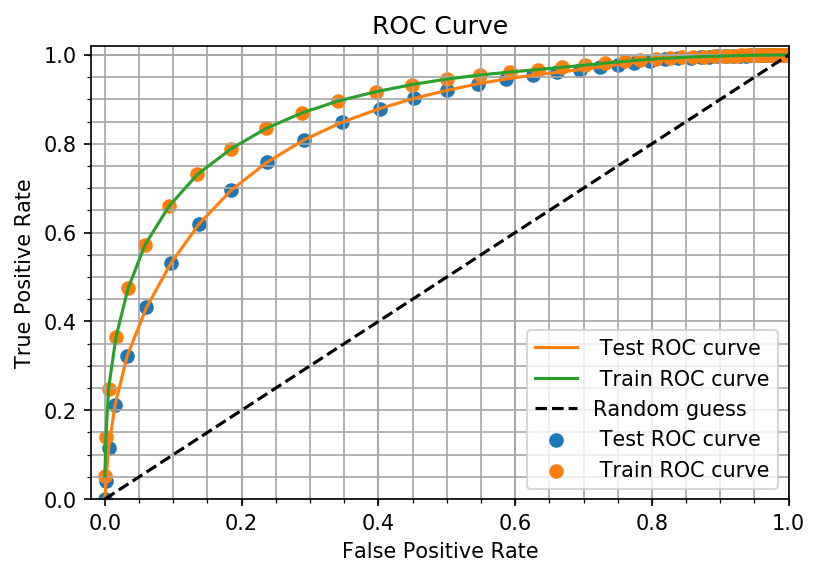

In [232]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr_test_tfidf_brute, tpr_test_tfidf_brute, thresholds = roc_curve(y_test, y_test_final_tfidf_with_optimal_k)
fpr_train_tfidf_brute, tpr_train_tfidf_brute, thresholds = roc_curve(y_train, y_train_final_tfidf_with_optimal_k)

# create plot
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.plot(neighbors_tfidf_brute, auc_train_tfidf_brute)
plt.plot(fpr_test_tfidf_brute, tpr_test_tfidf_brute, label=' Test ROC curve')
plt.scatter(fpr_test_tfidf_brute, tpr_test_tfidf_brute, label=' Test ROC curve')
plt.plot(fpr_train_tfidf_brute, tpr_train_tfidf_brute, label=' Train ROC curve')
plt.scatter(fpr_train_tfidf_brute, tpr_train_tfidf_brute, label=' Train ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [81]:
print ("So the best K with respect to KNN using TFIDF is "+ str(optimal_k))
print ("Thus below are the calculations when consider K as "+ str(optimal_k))

So the best K with respect to KNN using TFIDF is 63
Thus below are the calculations when consider K as 63


In [ ]:
y_train_final_tfidf_with_optimal_k_predict = []
y_test_final_tfidf_with_optimal_k_predict = []
auc_train_tfidf_optimal_k_predict = []
auc_test_tfidf_optimal_k_predict = []

bestknn_brute_tfidf = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute')
bestknn_brute_tfidf.fit(tfidf_X_with_stop_train, y_train)
for a in tqdm(range(0,tfidf_X_with_stop_train.shape[0],1000)):
    y_train_final_tfidf_with_optimal_k_predict.extend(bestknn_brute_tfidf.predict(tfidf_X_with_stop_train[a:a+1000]))
auc_train_tfidf_optimal_k_predict.append(roc_auc_score(y_train,y_train_final_tfidf_with_optimal_k_predict))
for b in tqdm(range(0, tfidf_X_with_stop_test.shape[0], 1000)):
    y_test_final_tfidf_with_optimal_k_predict.extend(bestknn_brute_tfidf.predict(tfidf_X_with_stop_test[b:b+1000]))
auc_test_tfidf_optimal_k_predict.append(roc_auc_score(y_test,y_test_final_tfidf_with_optimal_k_predict))



In [84]:
from sklearn.metrics import classification_report

print ("#######################################################")
print ("The classification report on Test dataset")
print ("#######################################################")

print(classification_report(y_test, y_test_final_tfidf_with_optimal_k_predict))


print ("#######################################################")
print ("The classification report on Training dataset")
print ("#######################################################")
print(classification_report(y_train, y_train_final_tfidf_with_optimal_k_predict))

#######################################################
The classification report on Test dataset
#######################################################
             precision    recall  f1-score   support

          0       0.90      0.07      0.13     21261
          1       0.83      1.00      0.91     99648

avg / total       0.85      0.84      0.77    120909

#######################################################
The classification report on Training dataset
#######################################################
             precision    recall  f1-score   support

          0       0.89      0.08      0.14     22681
          1       0.87      1.00      0.93    141791

avg / total       0.87      0.87      0.82    164472



In [263]:
from sklearn.metrics import accuracy_score

print((accuracy_score(y_test, y_test_final_tfidf_with_optimal_k_predict)))
print((accuracy_score(y_train, y_train_final_tfidf_with_optimal_k_predict)))


0.8353555153048987
0.8714553237025147


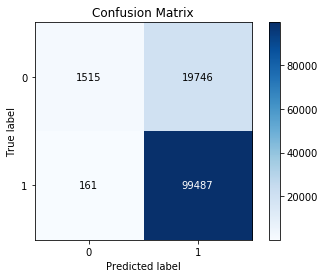

In [85]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_test,y_test_final_tfidf_with_optimal_k_predict)

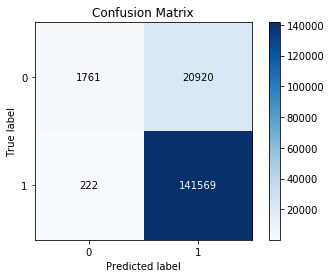

In [86]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_train,y_train_final_tfidf_with_optimal_k_predict)

### [5.1.3] Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [ ]:
lst_train=[]
lst_test=[]
lst_of_lst_train = []
lst_of_lst_test = []
lst_of_lst_CV =[]
lst_CV = []

for sentance in tqdm(X_with_stop_train):
    lst_train.append(sentance.strip())
for sentance in tqdm(lst_train):
    lst_of_lst_train.append(sentance.split())

for sent in tqdm(X_with_stop_test):
    lst_test.append(sent.strip())
for sent in tqdm(lst_test):
    lst_of_lst_test.append(sent.split())
    
for sent_CV in tqdm(X_with_stop_CV):
    lst_CV.append(sent_CV.strip())
for sent_CV in tqdm(lst_CV):
    lst_of_lst_CV.append(sent_CV.split())
    
w2v_model_self_taught_train=Word2Vec(lst_of_lst_train,min_count=1,size=50, workers=4)
w2v_words_train = list(w2v_model_self_taught_train.wv.vocab)


In [ ]:
sent_vectors1 = []
for sent1 in tqdm(lst_of_lst_train): # for each review/sentence
    sent_vec1 = np.zeros(50)
    cnt_words1 = 0
    for word1 in sent1:
        if word1 in w2v_words_train:
            vec1 = w2v_model_self_taught_train.wv[word1]
            sent_vec1 += vec1
            cnt_words1 += 1
    if cnt_words1 != 0:
        sent_vec1 /= cnt_words1
    sent_vectors1.append(sent_vec1) 

In [ ]:
sent_vectors2 = []
for sent2 in tqdm(lst_of_lst_test): # for each review/sentence
    sent_vec2 = np.zeros(50)
    cnt_words2 = 0
    for word2 in sent2:
        if word2 in w2v_words_train:
            vec2 = w2v_model_self_taught_train.wv[word2]
            sent_vec2 += vec2
            cnt_words2 += 1
    if cnt_words2 != 0:
        sent_vec2 /= cnt_words2
    sent_vectors2.append(sent_vec2)

In [ ]:
sent_vectors3 = []
for sent3 in tqdm(lst_of_lst_CV): # for each review/sentence
    sent_vec3 = np.zeros(50)
    cnt_words3 = 0
    for word3 in sent3:
        if word3 in w2v_words_train:
            vec3 = w2v_model_self_taught_train.wv[word3]
            sent_vec3 += vec3
            cnt_words3 += 1
    if cnt_words3 != 0:
        sent_vec3 /= cnt_words3
    sent_vectors3.append(sent_vec3)

In [ ]:
# creating odd list of K for KNN
neighbors_avg_w2v_brute = list(range(3,100,10))

# empty list AUC scores
auc_score_cv_avg_w2v_brute=[]
auc_score_train_avg_w2v_brute = []
prediction_cv_avg_w2v_brute = []
prediction_train_avg_w2v_brute = []

for k in tqdm(neighbors_avg_w2v_brute):
    knn_avg_w2v_brute = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    knn_avg_w2v_brute.fit(sent_vectors1, y_train)
    for a in (range(0,len(sent_vectors3),1000)):
        prediction_cv_avg_w2v_brute.extend(knn_avg_w2v_brute.predict_proba(sent_vectors3[a:a+1000])[:,1])
        if (len(sent_vectors3)) == (len(prediction_cv_avg_w2v_brute)):
            auc_score_cv_avg_w2v_brute.append(roc_auc_score(y_CV, prediction_cv_avg_w2v_brute))
            prediction_cv_avg_w2v_brute = []
    for ab in (range(0,len(sent_vectors1),1000)):
        prediction_train_avg_w2v_brute.extend(knn_avg_w2v_brute.predict_proba(sent_vectors1[ab:ab+1000])[:,1])
        if (len(sent_vectors1)) == (len(prediction_train_avg_w2v_brute)):
            auc_score_train_avg_w2v_brute.append(roc_auc_score(y_train, prediction_train_avg_w2v_brute))
            prediction_train_avg_w2v_brute = []

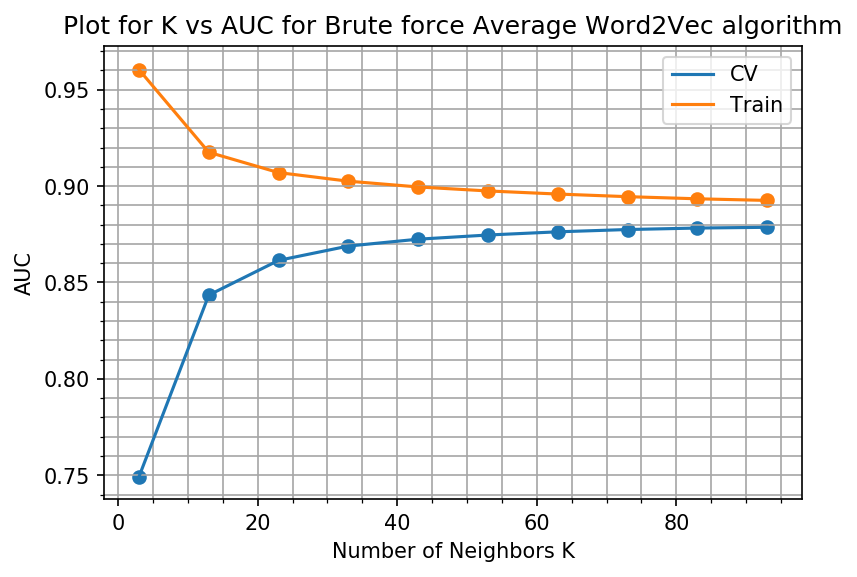

In [234]:
# plot AUC vs k
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot(neighbors_avg_w2v_brute, auc_score_cv_avg_w2v_brute)
plt.scatter(neighbors_avg_w2v_brute, auc_score_cv_avg_w2v_brute)
plt.plot(neighbors_avg_w2v_brute, auc_score_train_avg_w2v_brute)
plt.scatter(neighbors_avg_w2v_brute, auc_score_train_avg_w2v_brute)
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for Brute force Average Word2Vec algorithm")
plt.legend(['CV', 'Train'], loc='upper right')
plt.show()

### Determining best k
So from Graph we can say best k is 93 as difference between CV and Train is least

In [113]:
optimal_k_avg_w2v_brute = 93

In [114]:
# empty list scores
prediction_test_avg_w2v_brute_optimal_k = []
prediction_train_avg_w2v_brute_optimal_k = []

best_knn_avg_w2v_brute = KNeighborsClassifier(n_neighbors=optimal_k_avg_w2v_brute,algorithm='brute')
best_knn_avg_w2v_brute.fit(sent_vectors1, y_train)
for a in (range(0,len(sent_vectors2),1000)):
    prediction_test_avg_w2v_brute_optimal_k.extend(best_knn_avg_w2v_brute.predict_proba(sent_vectors2[a:a+1000])[:,1])
for ab in (range(0,len(sent_vectors1),1000)):
    prediction_train_avg_w2v_brute_optimal_k.extend(best_knn_avg_w2v_brute.predict_proba(sent_vectors1[ab:ab+1000])[:,1])


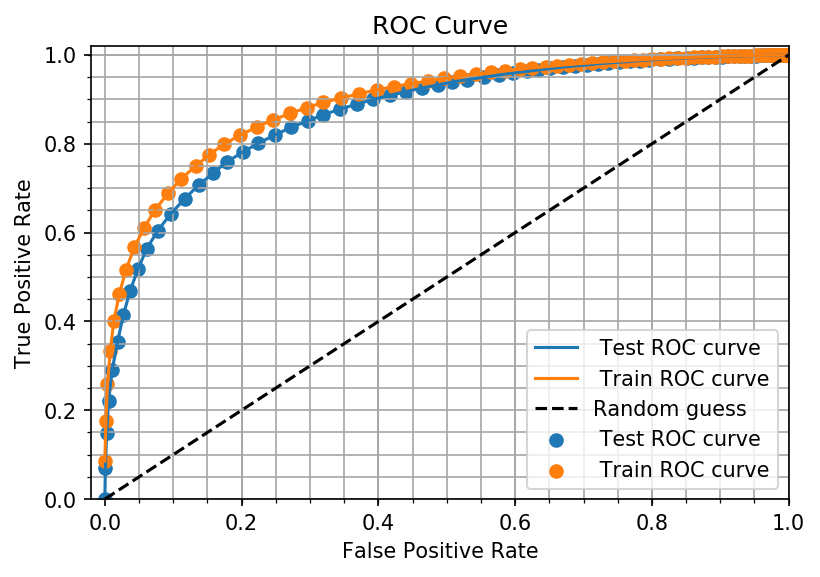

In [235]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr_test_avg_word2vec_brute, tpr_test_avg_word2vec_brute, thresholds = roc_curve(y_test, prediction_test_avg_w2v_brute_optimal_k)
fpr_train_avg_word2vec_brute, tpr_train_avg_word2vec_brute, thresholds = roc_curve(y_train, prediction_train_avg_w2v_brute_optimal_k)

# create plot
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot(fpr_test_avg_word2vec_brute, tpr_test_avg_word2vec_brute, label=' Test ROC curve')
plt.scatter(fpr_test_avg_word2vec_brute, tpr_test_avg_word2vec_brute, label=' Test ROC curve')
plt.plot(fpr_train_avg_word2vec_brute, tpr_train_avg_word2vec_brute, label=' Train ROC curve')
plt.scatter(fpr_train_avg_word2vec_brute, tpr_train_avg_word2vec_brute, label=' Train ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [116]:
test_avg_w2v_brute_optimal_k_pred = []
train_avg_w2v_brute_optimal_k_pred = []
for a in (range(0,len(sent_vectors2),1000)):
    test_avg_w2v_brute_optimal_k_pred.extend(best_knn_avg_w2v_brute.predict(sent_vectors2[a:a+1000]))
for ab in (range(0,len(sent_vectors1),1000)):
    train_avg_w2v_brute_optimal_k_pred.extend(best_knn_avg_w2v_brute.predict(sent_vectors1[ab:ab+1000]))

In [117]:
from sklearn.metrics import classification_report

print ("#######################################################")
print ("The classification report on Test dataset")
print ("#######################################################")

print(classification_report(y_test, test_avg_w2v_brute_optimal_k_pred))


print ("#######################################################")
print ("The classification report on Training dataset")
print ("#######################################################")
print(classification_report(y_train, train_avg_w2v_brute_optimal_k_pred))

#######################################################
The classification report on Test dataset
#######################################################
             precision    recall  f1-score   support

          0       0.81      0.18      0.29     21261
          1       0.85      0.99      0.91     99648

avg / total       0.84      0.85      0.80    120909

#######################################################
The classification report on Training dataset
#######################################################
             precision    recall  f1-score   support

          0       0.79      0.17      0.29     22681
          1       0.88      0.99      0.93    141791

avg / total       0.87      0.88      0.84    164472



In [265]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, test_avg_w2v_brute_optimal_k_pred))
print (accuracy_score(y_train, train_avg_w2v_brute_optimal_k_pred))

0.84774499830451
0.8796451675665159


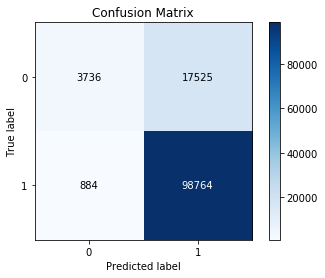

In [118]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_test,test_avg_w2v_brute_optimal_k_pred)

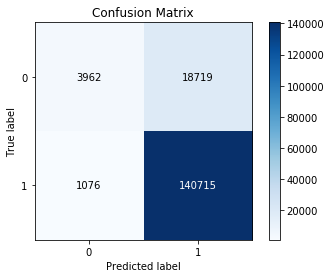

In [119]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_train,train_avg_w2v_brute_optimal_k_pred)

### [5.1.4] Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [206]:
model = TfidfVectorizer()
model.fit(X_with_stop_train)
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

tfidf_feat = model.get_feature_names() # tfidf words/col-names

tfidf_w2v_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent4 in (lst_of_lst_train): # for each review/sentence 
    sent_vec4 = np.zeros(50) # as word vectors are of zero length
    weight_sum4 =0; # num of words with a valid vector in the sentence/review
    for word4 in sent4: # for each word in a review/sentence
        if word4 in w2v_words_train and word4 in tfidf_feat:
            vec4 = w2v_model_self_taught_train.wv[word4]
            tf_idf_train = dictionary[word4]*(sent4.count(word4)/len(sent4))
            sent_vec4 += (vec4 * tf_idf_train)
            weight_sum4 += tf_idf_train
    if weight_sum4 != 0:
        sent_vec4 /= weight_sum4
    tfidf_w2v_sent_vectors_train.append(sent_vec4)
    row += 1

In [207]:
tfidf_w2v_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent5 in (lst_of_lst_test): # for each review/sentence 
    sent_vec5 = np.zeros(50) # as word vectors are of zero length
    weight_sum5 =0; # num of words with a valid vector in the sentence/review
    for word5 in sent5: # for each word in a review/sentence
        if word5 in w2v_words_train and word5 in tfidf_feat:
            vec5 = w2v_model_self_taught_train.wv[word5]
            tf_idf_test = dictionary[word5]*(sent5.count(word5)/len(sent5))
            sent_vec5 += (vec5 * tf_idf_test)
            weight_sum5 += tf_idf_test
    if weight_sum5 != 0:
        sent_vec5 /= weight_sum5
    tfidf_w2v_sent_vectors_test.append(sent_vec5)
    row += 1

In [208]:
tfidf_w2v_sent_vectors_cv = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent6 in (lst_of_lst_CV): # for each review/sentence 
    sent_vec6 = np.zeros(50) # as word vectors are of zero length
    weight_sum6 =0; # num of words with a valid vector in the sentence/review
    for word6 in sent6: # for each word in a review/sentence
        if word6 in w2v_words_train and word6 in tfidf_feat:
            vec6 = w2v_model_self_taught_train.wv[word6]
            tf_idf_cv = dictionary[word6]*(sent6.count(word6)/len(sent6))
            sent_vec6 += (vec6 * tf_idf_cv)
            weight_sum6 += tf_idf_cv
    if weight_sum6 != 0:
        sent_vec6 /= weight_sum6
    tfidf_w2v_sent_vectors_cv.append(sent_vec6)
    row += 1

In [ ]:
neighbors_tfidf_w2v_brute = list(range(3,100,10))

auc_cv_brute_tfidf_w2v = []
auc_train_brute_tfidf_w2v = []
prediction_cv_tfidf_w2v_brute = []
prediction_train_tfidf_w2v_brute = []

for k in tqdm(neighbors_tfidf_w2v_brute):
    knn_tfidf_w2v_brute = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    knn_tfidf_w2v_brute.fit(tfidf_w2v_sent_vectors_train, y_train)
    for a in (range(0,len(tfidf_w2v_sent_vectors_train),1000)):
        prediction_train_tfidf_w2v_brute.extend(knn_tfidf_w2v_brute.predict_proba(tfidf_w2v_sent_vectors_train[a:a+1000])[:,1])
        if (len(tfidf_w2v_sent_vectors_train)) == (len(prediction_train_tfidf_w2v_brute)):
            auc_train_brute_tfidf_w2v.append(roc_auc_score(y_train, prediction_train_tfidf_w2v_brute))
            prediction_train_tfidf_w2v_brute = []
    for ab in (range(0,len(tfidf_w2v_sent_vectors_cv),1000)):
        prediction_cv_tfidf_w2v_brute.extend(knn_tfidf_w2v_brute.predict_proba(tfidf_w2v_sent_vectors_cv[ab:ab+1000])[:,1])
        if (len(tfidf_w2v_sent_vectors_cv)) == (len(prediction_cv_tfidf_w2v_brute)):
            auc_cv_brute_tfidf_w2v.append(roc_auc_score(y_CV, prediction_cv_tfidf_w2v_brute))
            prediction_cv_tfidf_w2v_brute = []

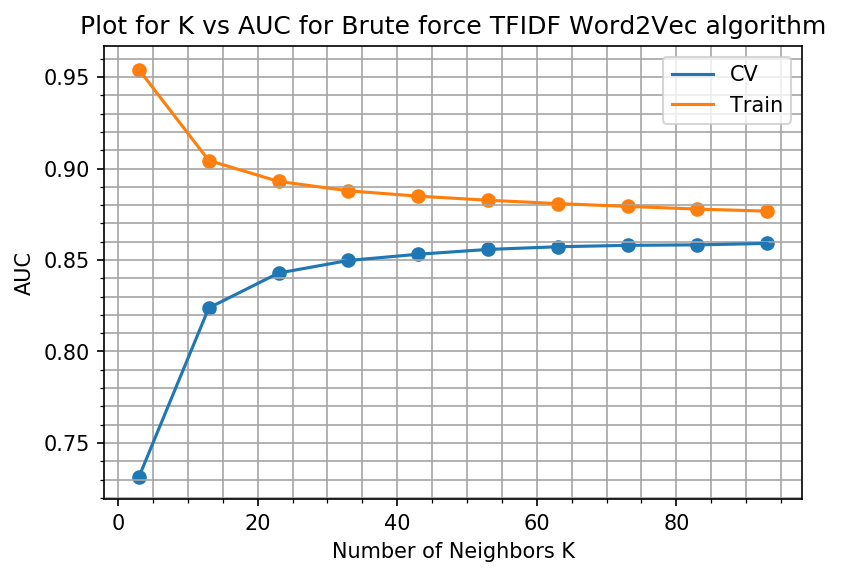

In [236]:
# plot AUC vs k
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot(neighbors_tfidf_w2v_brute, auc_cv_brute_tfidf_w2v)
plt.scatter(neighbors_tfidf_w2v_brute, auc_cv_brute_tfidf_w2v)
plt.plot(neighbors_tfidf_w2v_brute, auc_train_brute_tfidf_w2v)
plt.scatter(neighbors_tfidf_w2v_brute, auc_train_brute_tfidf_w2v)
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for Brute force TFIDF Word2Vec algorithm")
plt.legend(['CV', 'Train'], loc='upper right')
plt.show()

### Determine optimal K

The best k is 93 as per the above plot for TFIDF-W2V 

In [128]:
optimal_k_tfidf_w2v_brute = 93
predict_proba_test_tfidf_w2v_brute_optimal_k = []
predict_proba_train_tfidf_w2v_brute_optimal_k = []

best_knn_tfidf_w2v_brute = KNeighborsClassifier(n_neighbors=optimal_k_tfidf_w2v_brute,algorithm='brute')
best_knn_tfidf_w2v_brute.fit(tfidf_w2v_sent_vectors_train, y_train)
for a in (range(0,len(tfidf_w2v_sent_vectors_train),1000)):
    predict_proba_train_tfidf_w2v_brute_optimal_k.extend(best_knn_tfidf_w2v_brute.predict_proba(tfidf_w2v_sent_vectors_train[a:a+1000])[:,1])
for ab in (range(0,len(tfidf_w2v_sent_vectors_test),1000)):
    predict_proba_test_tfidf_w2v_brute_optimal_k.extend(best_knn_tfidf_w2v_brute.predict_proba(tfidf_w2v_sent_vectors_test[ab:ab+1000])[:,1])

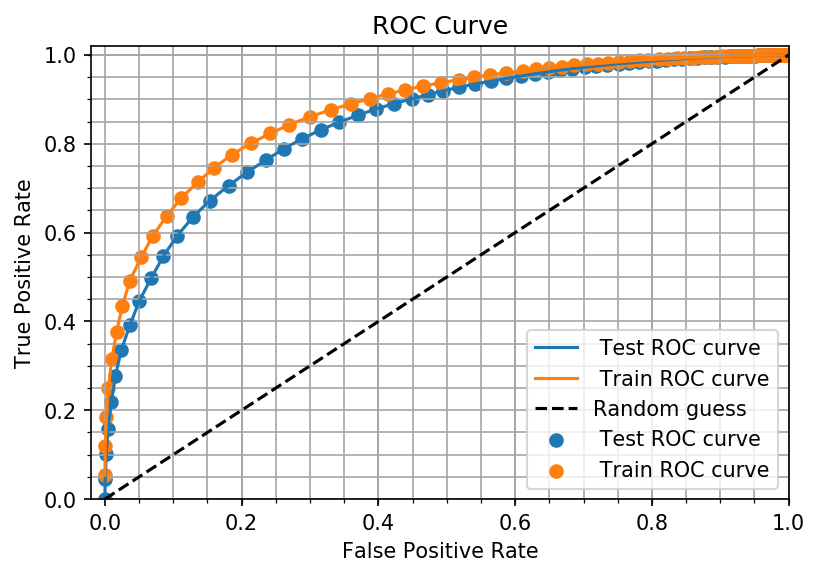

In [237]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr_test_tfidf_word2vec_brute, tpr_test_tfidf_word2vec_brute, thresholds = roc_curve(y_test, predict_proba_test_tfidf_w2v_brute_optimal_k)
fpr_train_tfidf_word2vec_brute, tpr_train_tfidf_word2vec_brute, thresholds = roc_curve(y_train, predict_proba_train_tfidf_w2v_brute_optimal_k)

# create plot
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot(fpr_test_tfidf_word2vec_brute, tpr_test_tfidf_word2vec_brute, label=' Test ROC curve')
plt.scatter(fpr_test_tfidf_word2vec_brute, tpr_test_tfidf_word2vec_brute, label=' Test ROC curve')
plt.plot(fpr_train_tfidf_word2vec_brute, tpr_train_tfidf_word2vec_brute, label=' Train ROC curve')
plt.scatter(fpr_train_tfidf_word2vec_brute, tpr_train_tfidf_word2vec_brute, label=' Train ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [130]:
test_tfidf_w2v_brute_optimal_k_pred = []
train_tfidf_w2v_brute_optimal_k_pred = []
for a in (range(0,len(tfidf_w2v_sent_vectors_train),1000)):
    train_tfidf_w2v_brute_optimal_k_pred.extend(best_knn_tfidf_w2v_brute.predict(tfidf_w2v_sent_vectors_train[a:a+1000]))
for ab in (range(0,len(tfidf_w2v_sent_vectors_test),1000)):
    test_tfidf_w2v_brute_optimal_k_pred.extend(best_knn_tfidf_w2v_brute.predict(tfidf_w2v_sent_vectors_test[ab:ab+1000]))

In [131]:
from sklearn.metrics import classification_report

print ("#######################################################")
print ("The classification report on Test dataset")
print ("#######################################################")

print(classification_report(y_test, test_tfidf_w2v_brute_optimal_k_pred))


print ("#######################################################")
print ("The classification report on Training dataset")
print ("#######################################################")
print(classification_report(y_train, train_tfidf_w2v_brute_optimal_k_pred))

#######################################################
The classification report on Test dataset
#######################################################
             precision    recall  f1-score   support

          0       0.81      0.14      0.25     21261
          1       0.84      0.99      0.91     99648

avg / total       0.84      0.84      0.80    120909

#######################################################
The classification report on Training dataset
#######################################################
             precision    recall  f1-score   support

          0       0.79      0.14      0.24     22681
          1       0.88      0.99      0.93    141791

avg / total       0.87      0.88      0.84    164472



In [266]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, test_tfidf_w2v_brute_optimal_k_pred))
print (accuracy_score(y_train, train_tfidf_w2v_brute_optimal_k_pred))

0.8434690552398911
0.8763740940707233


Confusion Matrix for Test Data of TFIDF WordtoVec Brute force algorithm


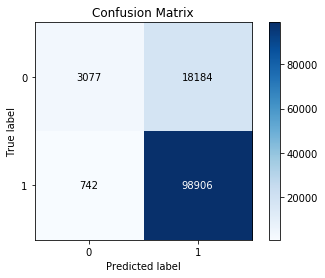

In [132]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_test,test_tfidf_w2v_brute_optimal_k_pred)
print ("Confusion Matrix for Test Data of TFIDF WordtoVec Brute force algorithm")

Confusion Matrix for Train Data of TFIDF WordtoVec Brute force algorithm


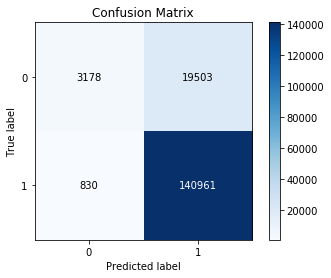

In [133]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_train,train_tfidf_w2v_brute_optimal_k_pred)
print ("Confusion Matrix for Train Data of TFIDF WordtoVec Brute force algorithm")

## [5.2] Applying KNN kd-tree

### [5.2.1] Applying KNN kd-tree on BOW,<font color='red'> SET 5</font>

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_kd = CountVectorizer()
bow_X_train_kd = vectorizer_kd.fit_transform(X_with_stop_train)
bow_X_test_kd = vectorizer_kd.transform(X_with_stop_test)
bow_X_CV_kd = vectorizer_kd.transform(X_with_stop_CV)


svd = TruncatedSVD()
bow_X_train_kd = svd.fit_transform(bow_X_train_kd)
bow_X_test_kd = svd.fit_transform(bow_X_test_kd)
bow_X_cv_kd = svd.fit_transform(bow_X_CV_kd)

In [ ]:
#This is for KD-Tree 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# creating odd list of K for KNN
neighbors_bow_kd = list(range(3,900,10))

auc_cv_KD_Tree_BOW = []
auc_train_KD_Tree_BOW=[]
y_train_pred_bow_kd = []
y_cv_pred_bow_kd = []

for k in tqdm(neighbors_bow_kd):
    knn_bow_kd = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    knn_bow_kd.fit(bow_X_train_kd, y_train)
    for a in tqdm(range(0, bow_X_train_kd.shape[0], 1000)):
        y_train_pred_bow_kd.extend(knn_bow_kd.predict_proba(bow_X_train_kd[a:a+1000])[:,1])
    if (len(y_train))== (len(y_train_pred_bow_kd)):
        auc_train_KD_Tree_BOW.append(roc_auc_score(y_train,y_train_pred_bow_kd))
        y_train_pred_bow_kd = []       
    for b in tqdm(range(0, bow_X_cv_kd.shape[0], 1000)):
        y_cv_pred_bow_kd.extend(knn_bow_kd.predict_proba(bow_X_cv_kd[b:b+1000])[:,1])
    if (len(y_CV))== (len(y_cv_pred_bow_kd)):
        auc_cv_KD_Tree_BOW.append(roc_auc_score(y_CV, y_cv_pred_bow_kd))
        y_cv_pred_bow_kd =[]



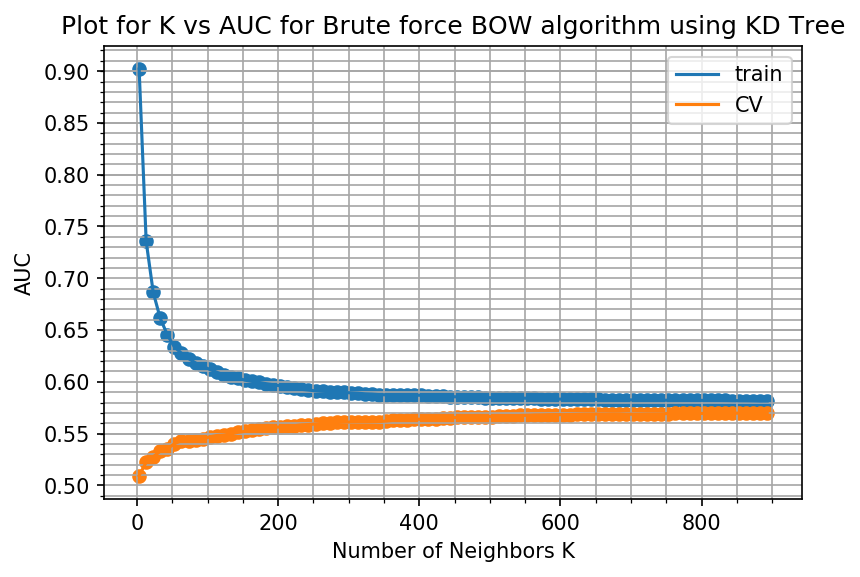

In [245]:
# plot AUC vs k
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot(neighbors_bow_kd, auc_train_KD_Tree_BOW)
plt.scatter(neighbors_bow_kd, auc_train_KD_Tree_BOW)
plt.plot(neighbors_bow_kd, auc_cv_KD_Tree_BOW)
plt.scatter(neighbors_bow_kd, auc_cv_KD_Tree_BOW)
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for Brute force BOW algorithm using KD Tree")
plt.legend(['train', 'CV'], loc='upper right')
plt.show()

In [146]:
optimal_k_bow_kd = 893
predict_proba_test_bow_kd_optimal_k = []
predict_proba_train_bow_kd_optimal_k = []

best_knn_bow_kd = KNeighborsClassifier(n_neighbors=optimal_k_bow_kd,algorithm='kd_tree')
best_knn_bow_kd.fit(bow_X_train_kd, y_train)
for a in (range(0,bow_X_train_kd.shape[0],1000)):
    predict_proba_train_bow_kd_optimal_k.extend(best_knn_bow_kd.predict_proba(bow_X_train_kd[a:a+1000])[:,1])
for ab in (range(0,bow_X_test_kd.shape[0],1000)):
    predict_proba_test_bow_kd_optimal_k.extend(best_knn_bow_kd.predict_proba(bow_X_test_kd[ab:ab+1000])[:,1])

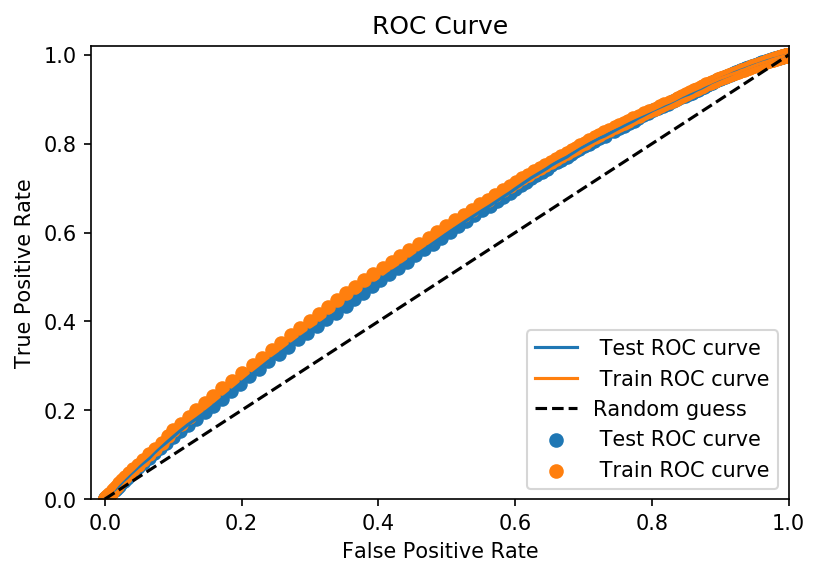

In [162]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr_test_bow_kd, tpr_test_bow_kd, thresholds = roc_curve(y_test, predict_proba_test_bow_kd_optimal_k)
fpr_train_bow_kd, tpr_train_bow_kd, thresholds = roc_curve(y_train, predict_proba_train_bow_kd_optimal_k)

# create plot
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.plot(fpr_test_bow_kd, tpr_test_bow_kd, label=' Test ROC curve')
plt.scatter(fpr_test_bow_kd, tpr_test_bow_kd, label=' Test ROC curve')
plt.plot(fpr_train_bow_kd, tpr_train_bow_kd, label=' Train ROC curve')
plt.scatter(fpr_train_bow_kd, tpr_train_bow_kd, label=' Train ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [148]:
predict_test_bow_kd_optimal_k = []
predict_train_bow_kd_optimal_k = []

best_knn_bow_kd = KNeighborsClassifier(n_neighbors=optimal_k_bow_kd,algorithm='kd_tree')
best_knn_bow_kd.fit(bow_X_train_kd, y_train)
for a in (range(0,bow_X_train_kd.shape[0],1000)):
    predict_train_bow_kd_optimal_k.extend(best_knn_bow_kd.predict(bow_X_train_kd[a:a+1000]))
for ab in (range(0,bow_X_test_kd.shape[0],1000)):
    predict_test_bow_kd_optimal_k.extend(best_knn_bow_kd.predict(bow_X_test_kd[ab:ab+1000]))

In [152]:
from sklearn.metrics import classification_report

print ("#######################################################")
print ("The classification report on Test dataset")
print ("#######################################################")

print(classification_report(y_test, predict_test_bow_kd_optimal_k))


print ("#######################################################")
print ("The classification report on Training dataset")
print ("#######################################################")
print(classification_report(y_train, predict_train_bow_kd_optimal_k))

#######################################################
The classification report on Test dataset
#######################################################
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     21261
          1       0.82      1.00      0.90     99648

avg / total       0.68      0.82      0.74    120909

#######################################################
The classification report on Training dataset
#######################################################
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     22681
          1       0.86      1.00      0.93    141791

avg / total       0.74      0.86      0.80    164472



In [267]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, predict_test_bow_kd_optimal_k))
print (accuracy_score(y_train, predict_train_bow_kd_optimal_k))

0.8241570106443689
0.8620981078846247


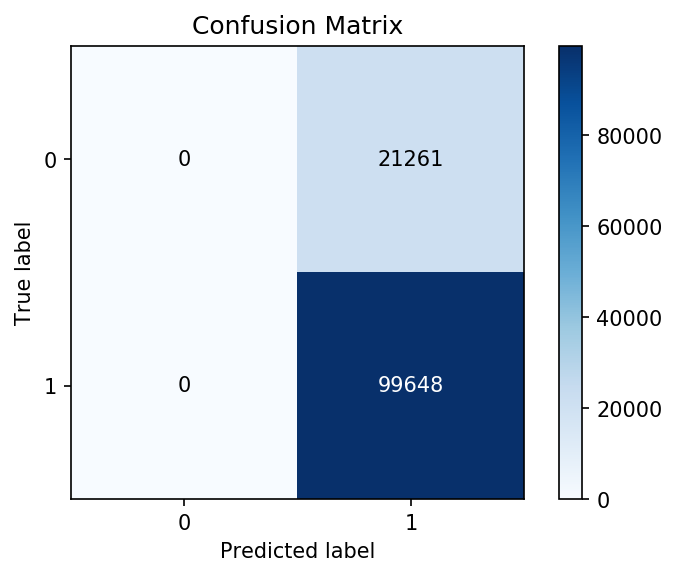

In [188]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_test,predict_test_bow_kd_optimal_k)

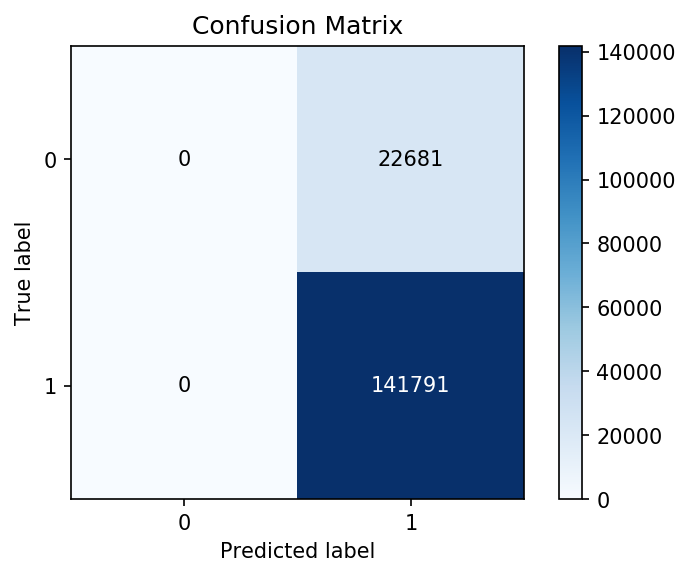

In [238]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_train, predict_train_bow_kd_optimal_k)

### [5.2.2] Applying KNN kd-tree on TFIDF,<font color='red'> SET 6</font>

In [156]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

#tfidf
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
tfidf_X_with_stop_train = tf_idf_vect.fit_transform(X_with_stop_train)
tfidf_X_with_stop_test = tf_idf_vect.transform(X_with_stop_test)
tfidf_X_with_stop_cv = tf_idf_vect.transform(X_with_stop_CV)

svd = TruncatedSVD()
tfidf_X_with_stop_train_kd_tree = svd.fit_transform(tfidf_X_with_stop_train)
tfidf_X_with_stop_test_kd_tree = svd.fit_transform(tfidf_X_with_stop_test)
tfidf_X_with_stop_cv_kd_tree =  svd.fit_transform(tfidf_X_with_stop_cv)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# creating odd list of K for KNN
neighbors_tfidf_kd = list(range(3,900,10))

# empty list that will hold auc scores
auc_cv_tfidf_kd_tree = []
auc_train_tfidf_kd_tree =[]
prediction_cv_tfidf_kd  = []
prediction_train_tfidf_kd = []

for k in tqdm(neighbors_tfidf_kd):
    knn_tfidf_kd = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    knn_tfidf_kd.fit(tfidf_X_with_stop_train_kd_tree, y_train)
    for a in (range(0,tfidf_X_with_stop_train_kd_tree.shape[0],1000)):
        print ("the value of k is "+ str(k))
        print ("the length of prediction_train_tfidf_kd before extension "+ str(len(prediction_train_tfidf_kd)))	    
        prediction_train_tfidf_kd.extend(knn_tfidf_kd.predict_proba(tfidf_X_with_stop_train_kd_tree[a:a+1000])[:,1])
        print ("the length of prediction_train_tfidf_kd after extension "+ str(len(prediction_train_tfidf_kd)))	    
    if (len(y_train))== (len(prediction_train_tfidf_kd)):   
        print ("the length of auc_train_tfidf_kd_tree before extension "+ str(len(auc_train_tfidf_kd_tree)))
        auc_train_tfidf_kd_tree.append(roc_auc_score(y_train, prediction_train_tfidf_kd))
        print ("the length of auc_train_tfidf_kd_tree after extension "+ str(len(auc_train_tfidf_kd_tree)))
        prediction_train_tfidf_kd = []
    for b in (range(0, tfidf_X_with_stop_cv_kd_tree.shape[0], 1000)):
        print ("the value of k is "+ str(k))
        print ("the length of prediction_cv_tfidf_kd before extension "+ str(len(prediction_cv_tfidf_kd)))	    	
        prediction_cv_tfidf_kd.extend(knn_tfidf_kd.predict_proba(tfidf_X_with_stop_cv_kd_tree[b:b+1000])[:,1])
        print ("the length of prediction_cv_tfidf_kd after extension "+ str(len(prediction_cv_tfidf_kd)))	    	
    if (len(y_CV))== (len(prediction_cv_tfidf_kd)):
        print ("the length of auc_cv_tfidf_kd_tree before extension "+ str(len(auc_cv_tfidf_kd_tree)))
        auc_cv_tfidf_kd_tree.append(roc_auc_score(y_CV, prediction_cv_tfidf_kd))
        print ("the length of auc_cv_tfidf_kd_tree after extension "+ str(len(auc_cv_tfidf_kd_tree)))
        prediction_cv_tfidf_kd =[]


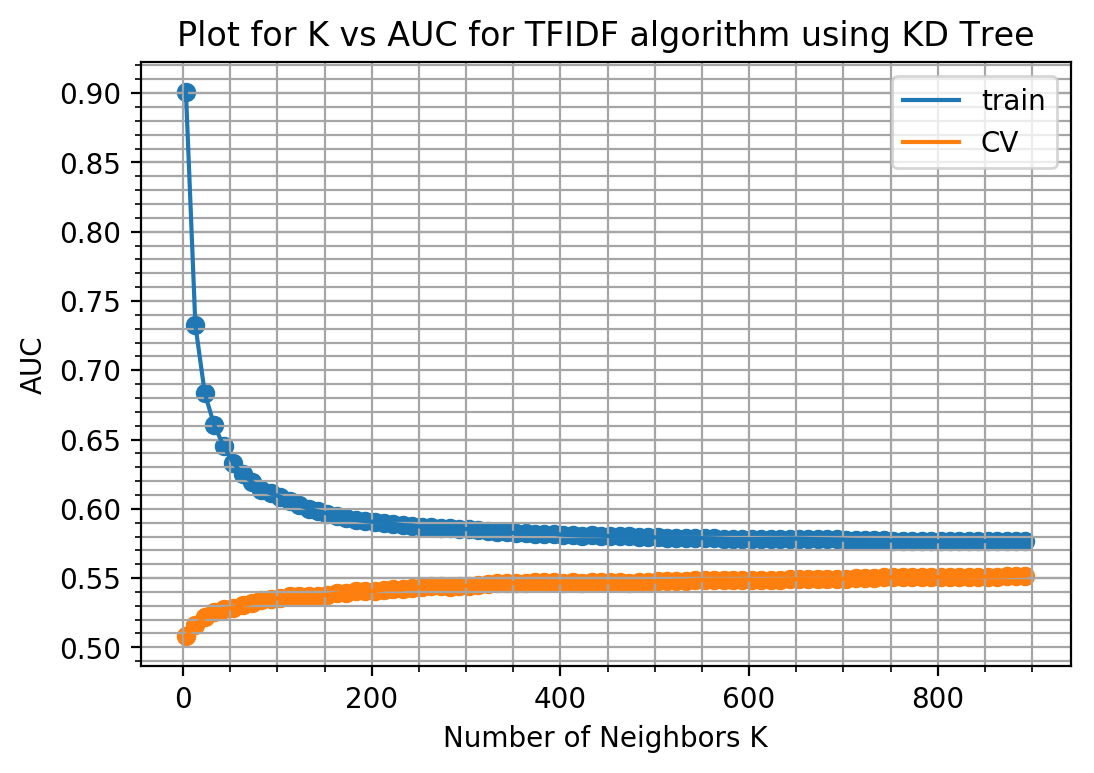

In [242]:
# plot AUC vs k

default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*2
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot(neighbors_tfidf_kd, auc_train_tfidf_kd_tree)
plt.scatter(neighbors_tfidf_kd, auc_train_tfidf_kd_tree)
plt.plot(neighbors_tfidf_kd, auc_cv_tfidf_kd_tree)
plt.scatter(neighbors_tfidf_kd, auc_cv_tfidf_kd_tree)
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for TFIDF algorithm using KD Tree")
plt.legend(['train', 'CV'], loc='upper right')

plt.show()

So the best K with respect to KNN using TFIDF for KD-Tree is 861


In [178]:
optimal_k_tfidf_kd = 861
predict_proba_test_tfidf_kd_optimal_k = []
predict_proba_train_tfidf_kd_optimal_k = []

best_knn_tfidf_kd = KNeighborsClassifier(n_neighbors=optimal_k_tfidf_kd,algorithm='kd_tree')
best_knn_tfidf_kd.fit(tfidf_X_with_stop_train_kd_tree, y_train)
for a in (range(0,tfidf_X_with_stop_train_kd_tree.shape[0],1000)):
    predict_proba_train_tfidf_kd_optimal_k.extend(best_knn_tfidf_kd.predict_proba(tfidf_X_with_stop_train_kd_tree[a:a+1000])[:,1])
for ab in (range(0,tfidf_X_with_stop_test_kd_tree.shape[0],1000)):
    predict_proba_test_tfidf_kd_optimal_k.extend(best_knn_tfidf_kd.predict_proba(tfidf_X_with_stop_test_kd_tree[ab:ab+1000])[:,1])

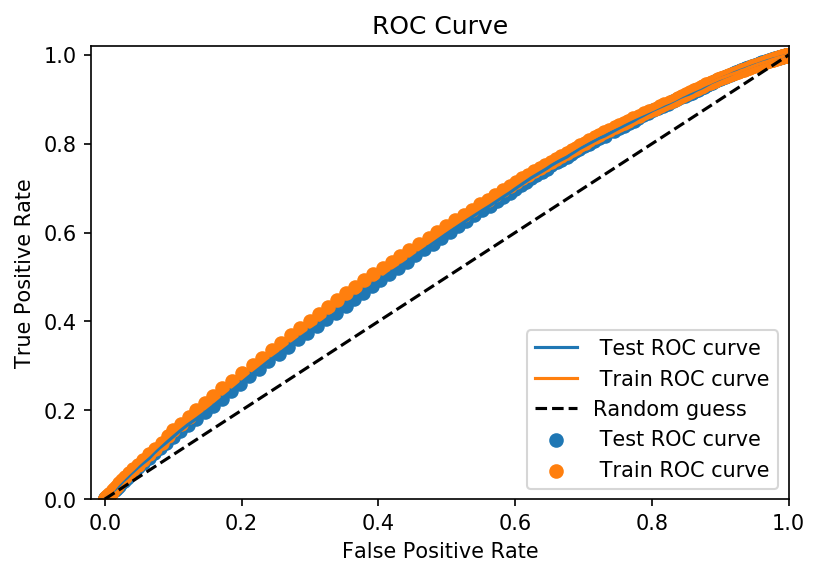

In [180]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr_test_tfidf_kd, tpr_test_tfidf_kd, thresholds = roc_curve(y_test, predict_proba_test_tfidf_kd_optimal_k)
fpr_train_tfidf_kd, tpr_train_tfidf_kd, thresholds = roc_curve(y_train, predict_proba_train_tfidf_kd_optimal_k)

# create plot
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.plot(fpr_test_bow_kd, tpr_test_bow_kd, label=' Test ROC curve')
plt.scatter(fpr_test_bow_kd, tpr_test_bow_kd, label=' Test ROC curve')
plt.plot(fpr_train_bow_kd, tpr_train_bow_kd, label=' Train ROC curve')
plt.scatter(fpr_train_bow_kd, tpr_train_bow_kd, label=' Train ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [182]:
predict_train_tfidf_kd_optimal_k =[]
predict_test_tfidf_kd_optimal_k = []
best_knn_tfidf_kd = KNeighborsClassifier(n_neighbors=optimal_k_tfidf_kd,algorithm='kd_tree')
best_knn_tfidf_kd.fit(tfidf_X_with_stop_train_kd_tree, y_train)
for a in (range(0,tfidf_X_with_stop_train_kd_tree.shape[0],1000)):
    predict_train_tfidf_kd_optimal_k.extend(best_knn_tfidf_kd.predict(tfidf_X_with_stop_train_kd_tree[a:a+1000]))
for ab in (range(0,tfidf_X_with_stop_test_kd_tree.shape[0],1000)):
    predict_test_tfidf_kd_optimal_k.extend(best_knn_tfidf_kd.predict(tfidf_X_with_stop_test_kd_tree[ab:ab+1000]))

In [183]:
from sklearn.metrics import classification_report

print ("#######################################################")
print ("The classification report on Test dataset")
print ("#######################################################")

print(classification_report(y_test, predict_test_tfidf_kd_optimal_k))


print ("#######################################################")
print ("The classification report on Training dataset")
print ("#######################################################")
print(classification_report(y_train, predict_train_tfidf_kd_optimal_k))

#######################################################
The classification report on Test dataset
#######################################################
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     21261
          1       0.82      1.00      0.90     99648

avg / total       0.68      0.82      0.74    120909

#######################################################
The classification report on Training dataset
#######################################################
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     22681
          1       0.86      1.00      0.93    141791

avg / total       0.74      0.86      0.80    164472



In [268]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, predict_test_tfidf_kd_optimal_k))
print (accuracy_score(y_train, predict_train_tfidf_kd_optimal_k))

0.8241570106443689
0.8620981078846247


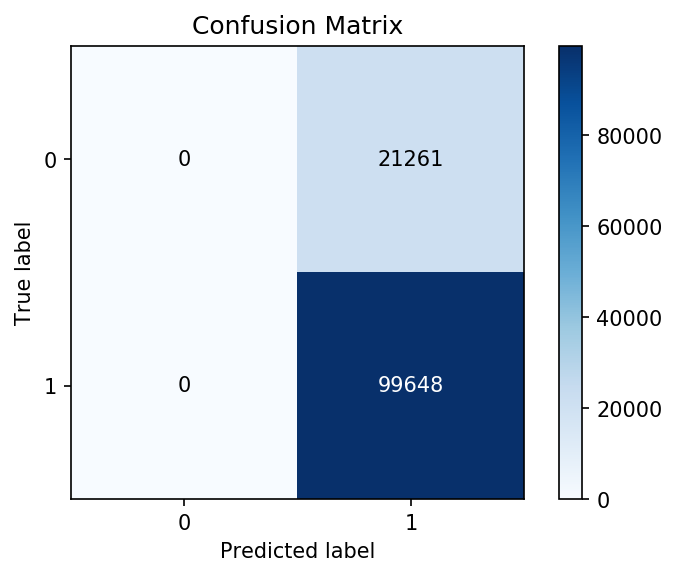

In [184]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_test,predict_test_tfidf_kd_optimal_k)

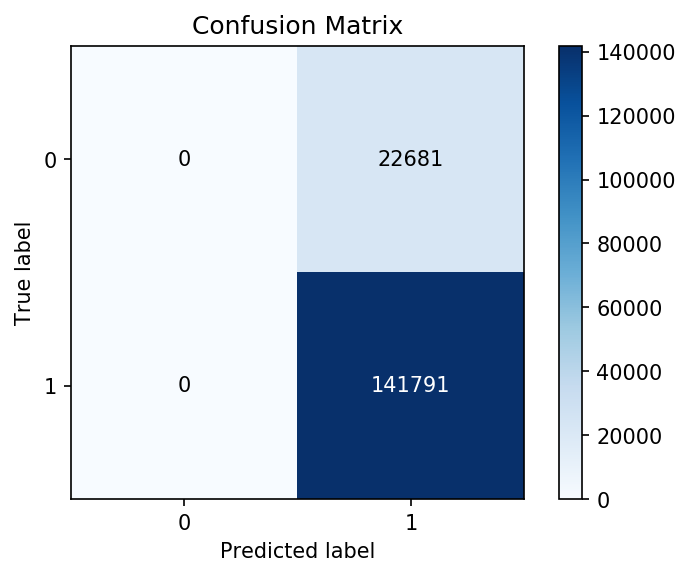

In [185]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_train, predict_train_tfidf_kd_optimal_k)

### [5.2.3] Applying KNN kd-tree on AVG W2V,<font color='red'> SET 7</font>

In [ ]:
# creating odd list of K for KNN
neighbors_avg_w2v_kd = list(range(3,100,10))

# empty list AUC scores
auc_score_cv_avg_w2v_kd=[]
auc_score_train_avg_w2v_kd = []
prediction_cv_avg_w2v_kd = []
prediction_train_avg_w2v_kd = []

for k in tqdm(neighbors_avg_w2v_kd):
    knn_avg_w2v_kd = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',leaf_size = 300)
    knn_avg_w2v_kd.fit(sent_vectors1, y_train)
    for a in tqdm(range(0,len(sent_vectors3),1000)):
        prediction_cv_avg_w2v_kd.extend(knn_avg_w2v_kd.predict_proba(sent_vectors3[a:a+1000])[:,1])
        if (len(sent_vectors3)) == (len(prediction_cv_avg_w2v_kd)):
            auc_score_cv_avg_w2v_kd.append(roc_auc_score(y_CV, prediction_cv_avg_w2v_kd))
            prediction_cv_avg_w2v_kd = []
    for ab in tqdm(range(0,len(sent_vectors1),1000)):
        prediction_train_avg_w2v_kd.extend(knn_avg_w2v_kd.predict_proba(sent_vectors1[ab:ab+1000])[:,1])
        if (len(sent_vectors1)) == (len(prediction_train_avg_w2v_kd)):
            auc_score_train_avg_w2v_kd.append(roc_auc_score(y_train, prediction_train_avg_w2v_kd))
            prediction_train_avg_w2v_kd = []

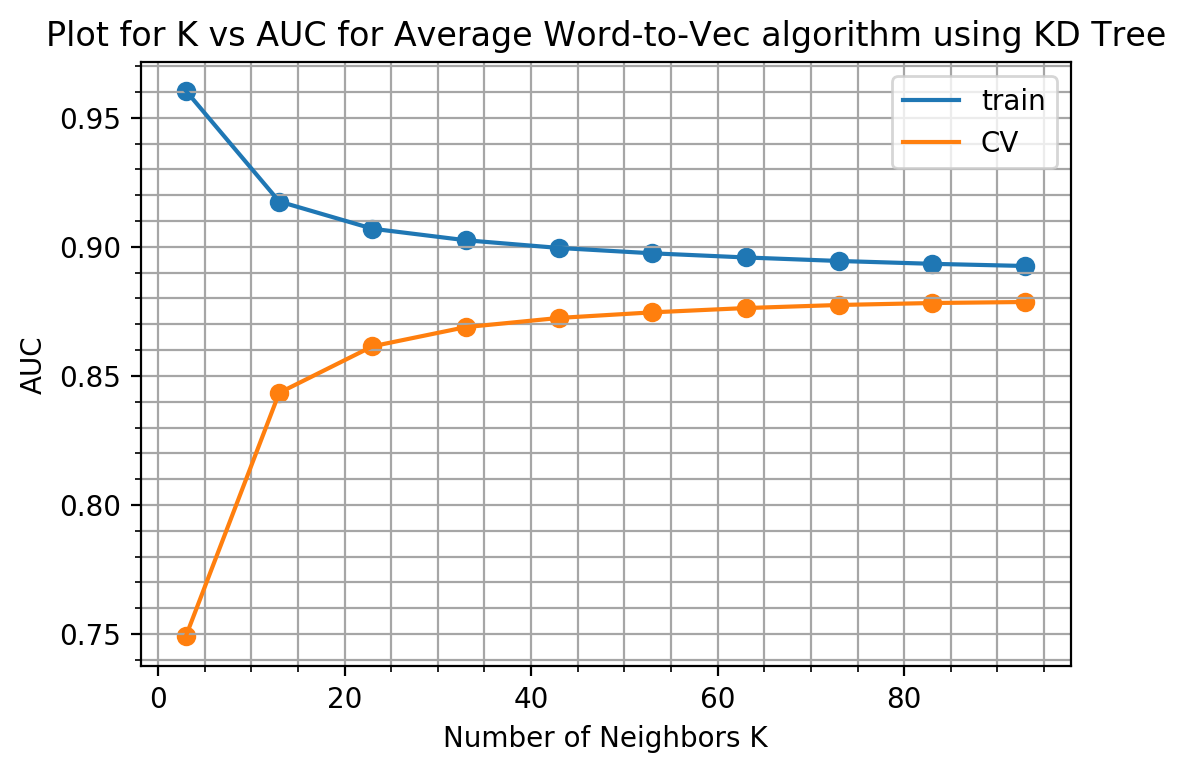

In [243]:
# plot AUC vs k

default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*2
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot(neighbors_avg_w2v_kd, auc_score_train_avg_w2v_kd)
plt.scatter(neighbors_avg_w2v_kd, auc_score_train_avg_w2v_kd)
plt.plot(neighbors_avg_w2v_kd, auc_score_cv_avg_w2v_kd)
plt.scatter(neighbors_avg_w2v_kd, auc_score_cv_avg_w2v_kd)
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for Average Word-to-Vec algorithm using KD Tree")
plt.legend(['train', 'CV'], loc='upper right')

plt.show()

In [193]:
#Determine Optimal K
optimal_k_avg_w2v_kd = 73

In [ ]:
# empty list AUC scores
bestknn_prediction_test_avg_w2v_kd = []
bestknn_prediction_train_avg_w2v_kd = []

bestknn_avg_w2v_kd = KNeighborsClassifier(n_neighbors=optimal_k_avg_w2v_kd,algorithm='kd_tree',leaf_size = 300)
bestknn_avg_w2v_kd.fit(sent_vectors1, y_train)
for a in tqdm(range(0,len(sent_vectors2),1000)):
    bestknn_prediction_test_avg_w2v_kd.extend(bestknn_avg_w2v_kd.predict_proba(sent_vectors2[a:a+1000])[:,1])
for ab in tqdm(range(0,len(sent_vectors1),1000)):
    bestknn_prediction_train_avg_w2v_kd.extend(bestknn_avg_w2v_kd.predict_proba(sent_vectors1[ab:ab+1000])[:,1])

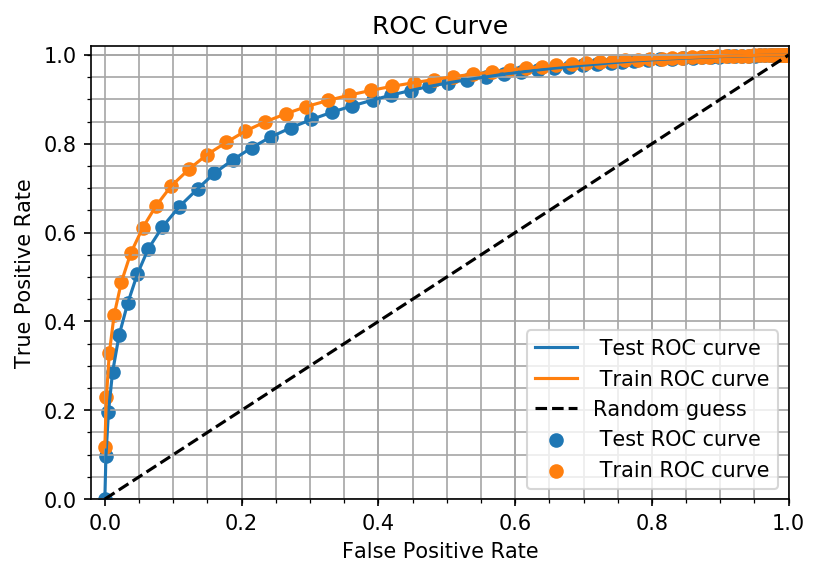

In [244]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr_test_avg_w2v_kd, tpr_test_avg_w2v_kd, thresholds = roc_curve(y_test, bestknn_prediction_test_avg_w2v_kd)
fpr_train_avg_w2v_kd, tpr_train_avg_w2v_kd, thresholds = roc_curve(y_train, bestknn_prediction_train_avg_w2v_kd)

# create plot
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.plot(fpr_test_avg_w2v_kd, tpr_test_avg_w2v_kd, label=' Test ROC curve')
plt.scatter(fpr_test_avg_w2v_kd, tpr_test_avg_w2v_kd, label=' Test ROC curve')
plt.plot(fpr_train_avg_w2v_kd, tpr_train_avg_w2v_kd, label=' Train ROC curve')
plt.scatter(fpr_train_avg_w2v_kd, tpr_train_avg_w2v_kd, label=' Train ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [199]:
bestknn_prediction_rounded_test_avg_w2v_kd= [round(x) for x in bestknn_prediction_test_avg_w2v_kd]
bestknn_prediction_rounded_train_avg_w2v_kd= [round(xy) for xy in bestknn_prediction_train_avg_w2v_kd]


In [200]:
from sklearn.metrics import classification_report

print ("#######################################################")
print ("The classification report on Test dataset")
print ("#######################################################")

print(classification_report(y_test, bestknn_prediction_rounded_test_avg_w2v_kd))


print ("#######################################################")
print ("The classification report on Training dataset")
print ("#######################################################")
print(classification_report(y_train, bestknn_prediction_rounded_train_avg_w2v_kd))

#######################################################
The classification report on Test dataset
#######################################################
             precision    recall  f1-score   support

          0       0.80      0.19      0.30     21261
          1       0.85      0.99      0.92     99648

avg / total       0.84      0.85      0.81    120909

#######################################################
The classification report on Training dataset
#######################################################
             precision    recall  f1-score   support

          0       0.79      0.19      0.30     22681
          1       0.88      0.99      0.93    141791

avg / total       0.87      0.88      0.85    164472



In [269]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, bestknn_prediction_rounded_test_avg_w2v_kd))
print (accuracy_score(y_train, bestknn_prediction_rounded_train_avg_w2v_kd))

0.8490269541556046
0.8806970183374678


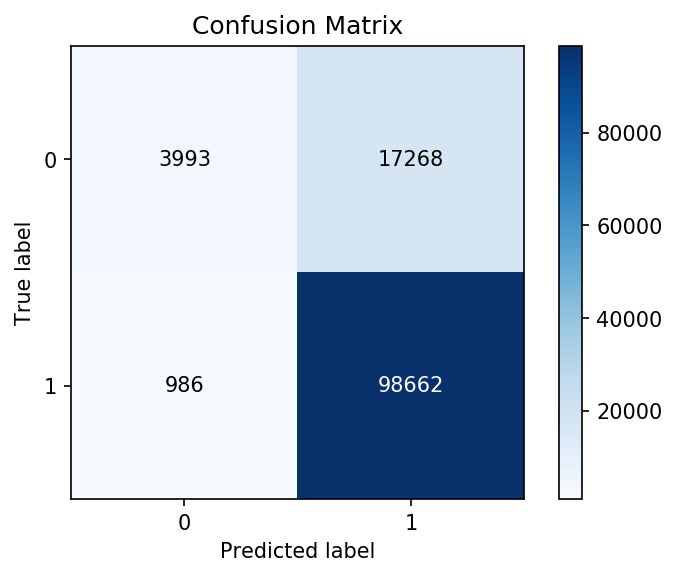

In [201]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_test,bestknn_prediction_rounded_test_avg_w2v_kd)

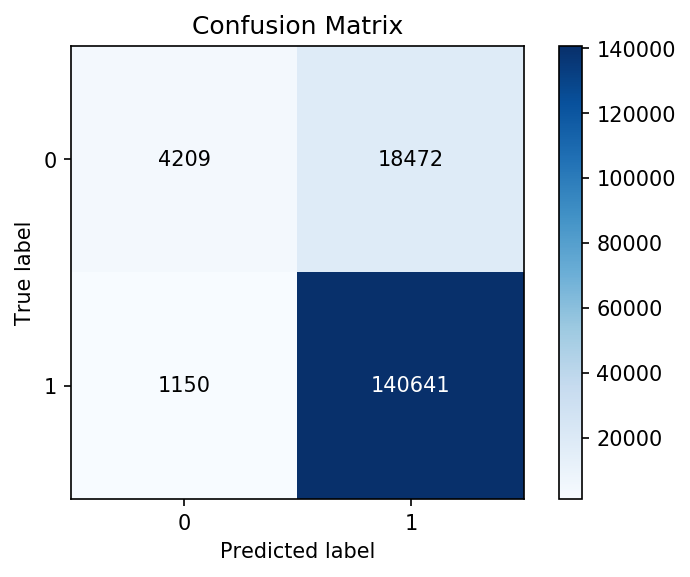

In [202]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_train, bestknn_prediction_rounded_train_avg_w2v_kd)

### [5.2.4] Applying KNN kd-tree on TFIDF W2V,<font color='red'> SET 8</font>

In [209]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
tfidf_sent_vectors_train_kd = svd.fit_transform(tfidf_w2v_sent_vectors_train)
tfidf_sent_vectors_test_kd = svd.fit_transform(tfidf_w2v_sent_vectors_test)
tfidf_sent_vectors_cv_kd = svd.fit_transform(tfidf_w2v_sent_vectors_cv)

In [ ]:
neighbors_tfidf_w2v_kd = list(range(3,300,10))

prediction_cv_tfidf_w2v_kd = []
auc_train_kd_tfidf_w2v = []
prediction_train_tfidf_w2v_kd = []
auc_cv_kd_tfidf_w2v =[]

for k in tqdm(neighbors_tfidf_w2v_kd):
    knn_tfidf_w2v_kd = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',leaf_size = 300)
    knn_tfidf_w2v_kd.fit(tfidf_sent_vectors_train_kd, y_train)
    for a in (range(0,len(tfidf_sent_vectors_train_kd),1000)):
        prediction_train_tfidf_w2v_kd.extend(knn_tfidf_w2v_kd.predict_proba(tfidf_sent_vectors_train_kd[a:a+1000])[:,1])
        if (len(tfidf_sent_vectors_train_kd)) == (len(prediction_train_tfidf_w2v_kd)):
            auc_train_kd_tfidf_w2v.append(roc_auc_score(y_train, prediction_train_tfidf_w2v_kd))
            prediction_train_tfidf_w2v_kd = []
    for ab in (range(0,len(tfidf_sent_vectors_cv_kd),1000)):
        prediction_cv_tfidf_w2v_kd.extend(knn_tfidf_w2v_kd.predict_proba(tfidf_sent_vectors_cv_kd[ab:ab+1000])[:,1])
        if (len(tfidf_sent_vectors_cv_kd)) == (len(prediction_cv_tfidf_w2v_kd)):
            auc_cv_kd_tfidf_w2v.append(roc_auc_score(y_CV, prediction_cv_tfidf_w2v_kd))
            prediction_cv_tfidf_w2v_kd = []

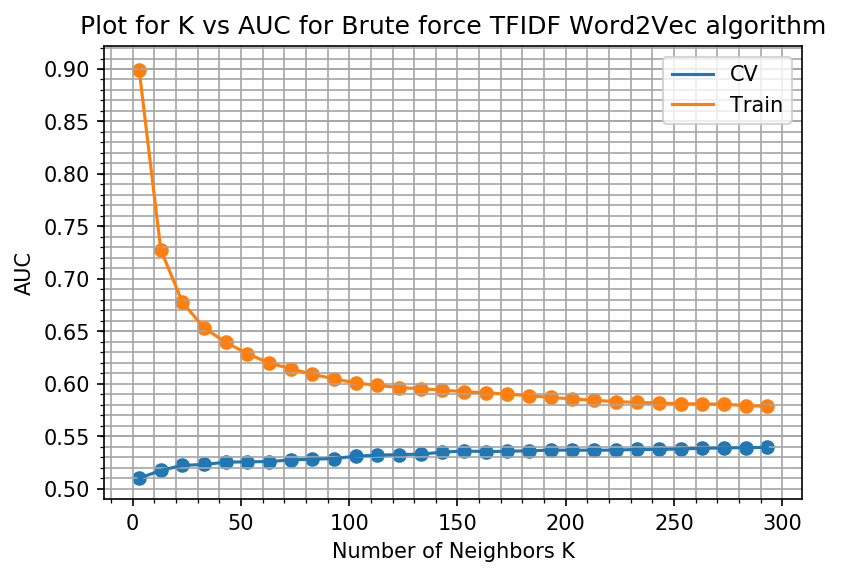

In [216]:
# plot AUC vs k
plt.plot(neighbors_tfidf_w2v_kd, auc_cv_kd_tfidf_w2v)
plt.scatter(neighbors_tfidf_w2v_kd, auc_cv_kd_tfidf_w2v)
plt.plot(neighbors_tfidf_w2v_kd, auc_train_kd_tfidf_w2v)
plt.scatter(neighbors_tfidf_w2v_kd, auc_train_kd_tfidf_w2v)
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.title("Plot for K vs AUC for Brute force TFIDF Word2Vec algorithm")
plt.legend(['CV', 'Train'], loc='upper right')
plt.minorticks_on()
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.show()

In [217]:
# Determine best K


In [218]:
optimal_k_tfidf_w2v_kd = 290
predict_proba_test_tfidf_w2v_kd_optimal_k = []
predict_proba_train_tfidf_w2v_kd_optimal_k = []

best_knn_tfidf_w2v_kd = KNeighborsClassifier(n_neighbors=optimal_k_tfidf_w2v_kd,algorithm='kd_tree')
best_knn_tfidf_w2v_kd.fit(tfidf_sent_vectors_train_kd, y_train)
for a in (range(0,len(tfidf_sent_vectors_train_kd),1000)):
    predict_proba_train_tfidf_w2v_kd_optimal_k.extend(best_knn_tfidf_w2v_kd.predict_proba(tfidf_sent_vectors_train_kd[a:a+1000])[:,1])
for ab in (range(0,len(tfidf_sent_vectors_test_kd),1000)):
    predict_proba_test_tfidf_w2v_kd_optimal_k.extend(best_knn_tfidf_w2v_kd.predict_proba(tfidf_sent_vectors_test_kd[ab:ab+1000])[:,1])

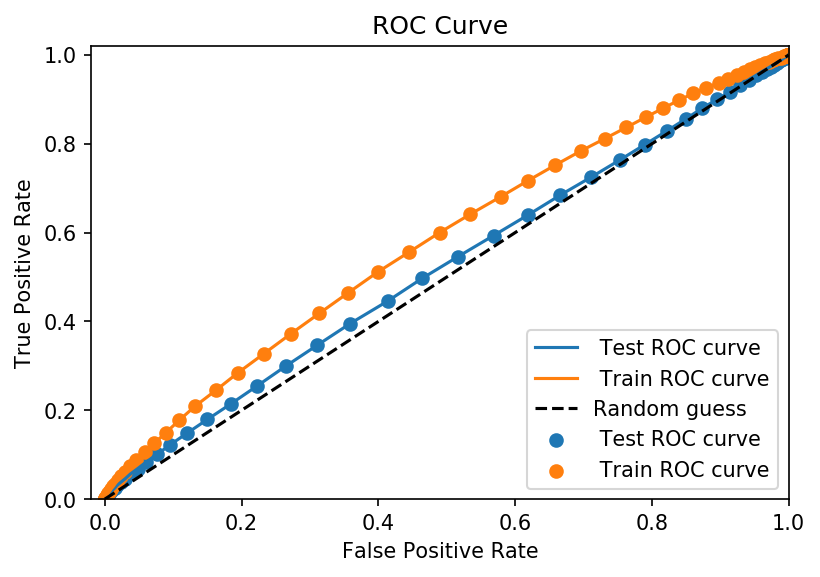

In [219]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr_test_tfidf_w2v_kd, tpr_test_tfidf_w2v_kd, thresholds = roc_curve(y_test, predict_proba_test_tfidf_w2v_kd_optimal_k)
fpr_train_tfidf_w2v_kd, tpr_train_tfidf_w2v_kd, thresholds = roc_curve(y_train, predict_proba_train_tfidf_w2v_kd_optimal_k)

# create plot
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.5
plt.plot(fpr_test_tfidf_w2v_kd, tpr_test_tfidf_w2v_kd, label=' Test ROC curve')
plt.scatter(fpr_test_tfidf_w2v_kd, tpr_test_tfidf_w2v_kd, label=' Test ROC curve')
plt.plot(fpr_train_tfidf_w2v_kd, tpr_train_tfidf_w2v_kd, label=' Train ROC curve')
plt.scatter(fpr_train_tfidf_w2v_kd, tpr_train_tfidf_w2v_kd, label=' Train ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [220]:
predict_proba_rounded_test_tfidf_w2v_kd_optimal_k= [round(x) for x in predict_proba_test_tfidf_w2v_kd_optimal_k]
predict_proba_Rounded_train_tfidf_w2v_kd_optimal_k= [round(xy) for xy in predict_proba_train_tfidf_w2v_kd_optimal_k]

In [221]:
from sklearn.metrics import classification_report

print ("#######################################################")
print ("The classification report on Test dataset")
print ("#######################################################")

print(classification_report(y_test, predict_proba_rounded_test_tfidf_w2v_kd_optimal_k))


print ("#######################################################")
print ("The classification report on Training dataset")
print ("#######################################################")
print(classification_report(y_train, predict_proba_Rounded_train_tfidf_w2v_kd_optimal_k))

#######################################################
The classification report on Test dataset
#######################################################
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     21261
          1       0.82      1.00      0.90     99648

avg / total       0.68      0.82      0.74    120909

#######################################################
The classification report on Training dataset
#######################################################
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     22681
          1       0.86      1.00      0.93    141791

avg / total       0.74      0.86      0.80    164472



In [270]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, predict_proba_rounded_test_tfidf_w2v_kd_optimal_k))
print (accuracy_score(y_train, predict_proba_Rounded_train_tfidf_w2v_kd_optimal_k))

0.8241570106443689
0.8620981078846247


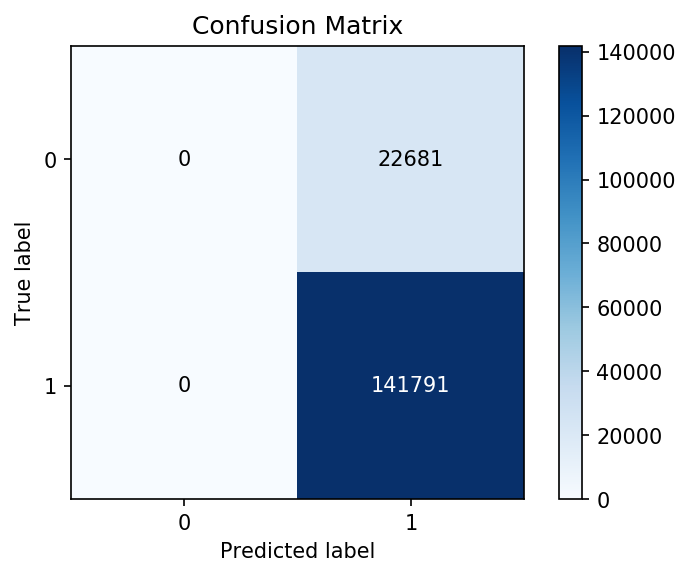

In [222]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_train, predict_proba_Rounded_train_tfidf_w2v_kd_optimal_k)

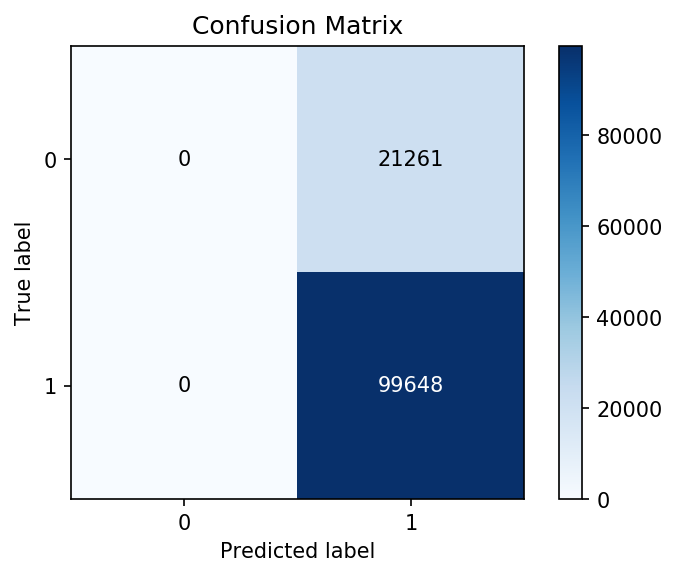

In [223]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_test, predict_proba_rounded_test_tfidf_w2v_kd_optimal_k)

# [6] Conclusions

In [273]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Algorithm","Hyper Parameter K", "Precision", "Recall", "Accuracy"]

x.add_row(["Bag Of Words(Brute) Test Negative", 27, 0.81, 0.02,0.8272006219])
x.add_row(["Bag Of Words(Brute) Test Positive", 27, 0.83, 1,.8272006219])
x.add_row(["Bag Of Words(Brute) Train Negative", 27, 0.91, 0.03,.8656853446179289])
x.add_row(["Bag Of Words(Brute) Train Positive", 27, 0.87, 1,0.8656853446179289])
x.add_row(["TFIDF (Brute) Test Negative", 63, 0.90,.07,.8353555153048987])
x.add_row(["TFIDF (Brute) Test Positive", 63, 0.83,1,.8353555153048987])
x.add_row(["TFIDF (Brute) Train Negative", 63, 0.89,.08,.8714553237025147])
x.add_row(["TFIDF (Brute) Train Positive", 63, 0.87,1,.8714553237025147])
x.add_row(["Average Word2Vec (Brute) Test Negative", 93, 0.81, 0.18,0.84774499830451])
x.add_row(["Average Word2Vec (Brute) Test Positive", 93, 0.85, 0.99,0.84774499830451])
x.add_row(["Average Word2Vec (Brute) Train Negative", 93, 0.79, 0.17,0.8796451675665159])
x.add_row(["Average Word2Vec (Brute) Train Positive", 93, 0.88, 0.99,0.8796451675665159])
x.add_row(["TFIDF Word2Vec (Brute) Test Negative", 93, 0.81, 0.14,0.8434690552398911])
x.add_row(["TFIDF Word2Vec (Brute) Test Positive", 93, 0.84, 0.99,0.8434690552398911])
x.add_row(["TFIDF Word2Vec (Brute) Train Negative", 93, 0.79, 0.14,0.8763740940707233])
x.add_row(["TFIDF Word2Vec (Brute) Train Positive", 93, 0.88, 0.99,0.8763740940707233])
x.add_row(["Bag Of Words(KD-Tree) Test Negative", 893, 0.0, 0.0,0.8241570106443689])
x.add_row(["Bag Of Words(KD-Tree) Test Positive", 893, 0.82, 1,0.8241570106443689])
x.add_row(["Bag Of Words(KD-Tree) Train Negative", 893, 0.0, 0,0.8620981078846247])
x.add_row(["Bag Of Words(KD-Tree) Train Positive", 893, 0.82, 1,0.8620981078846247])
x.add_row(["TFIDF (KD-Tree) Test Negative", 861, 0.0,0.0,0.8241570106443689])
x.add_row(["TFIDF (KD-Tree) Test Positive", 861, 0.82,1,0.8241570106443689])
x.add_row(["TFIDF (KD-Tree) Train Negative", 861, 0.0,0,0.8620981078846247])
x.add_row(["TFIDF (KD-Tree) Train Positive", 861, 0.86,1,0.8620981078846247])
x.add_row(["Average Word2Vec (KD-Tree) Test Negative", 73, 0.80, 0.19,0.8490269541556046])
x.add_row(["Average Word2Vec (KD-Tree) Test Positive", 73, 0.85, 0.99,0.8490269541556046])
x.add_row(["Average Word2Vec (KD-Tree) Train Negative", 73, 0.79, 0.19,0.8806970183374678])
x.add_row(["Average Word2Vec (KD-Tree) Train Positive", 73, 0.88, 0.99,0.8806970183374678])
x.add_row(["TFIDF Word2Vec (KD-Tree) Test Negative", 290, 0, 0,0.8241570106443689])
x.add_row(["TFIDF Word2Vec (KD-Tree) Test Positive", 290, .82,1,0.8241570106443689])
x.add_row(["TFIDF Word2Vec (KD-Tree) Train Negative", 290, 0.0, 0,0.8620981078846247])
x.add_row(["TFIDF Word2Vec (KD-Tree) Train Positive", 290, 0.86, 1,0.8620981078846247])
print(x)

+-------------------------------------------+-------------------+-----------+--------+--------------------+
|                 Algorithm                 | Hyper Parameter K | Precision | Recall |      Accuracy      |
+-------------------------------------------+-------------------+-----------+--------+--------------------+
|     Bag Of Words(Brute) Test Negative     |         27        |    0.81   |  0.02  |    0.8272006219    |
|     Bag Of Words(Brute) Test Positive     |         27        |    0.83   |   1    |    0.8272006219    |
|     Bag Of Words(Brute) Train Negative    |         27        |    0.91   |  0.03  | 0.8656853446179289 |
|     Bag Of Words(Brute) Train Positive    |         27        |    0.87   |   1    | 0.8656853446179289 |
|        TFIDF (Brute) Test Negative        |         63        |    0.9    |  0.07  | 0.8353555153048987 |
|        TFIDF (Brute) Test Positive        |         63        |    0.83   |   1    | 0.8353555153048987 |
|        TFIDF (Brute) Train

We know we have a imbalanced dataset with almost 85% positive (marked as 1) and almost 15% negative reviews (marked as 0)
Also few formula lets just write down to make our life easier while doing conclusion

Recall = (TP/ TP+FN)
Precision = (TP/TP+FP)

So in our ideal scenario 
TP ≈ .85, TN ≈ .15, FP≈0 , FN ≈ 0

Lets go through each and very algo one by one:

1) BOW Brute:
Here we see this algo performs well on accuracy,precision front however it is not very sentive as in recall isn't that good.This means this algo isn't able to properly guess a truly negative review as negative but as positive
2) TFIDF Brute: Pretty much same as BOW Brute
3) Average W2V Brute: This algo also on similar lines of other algos performs pretty ok infact recall is much better than other first algo. So far we can call out this as best algo of all
4) TFIDF W2V Brute: Same as Avg W2V Brute.
The disadvanatge for Average W2V and TFIDF W2V was the time it took. It took almost 2 days to run both the algorithm

5)BOW KD:Poor senstivity of this algo and algo in other fronts
6) TFIDF KD: Same as BOW KD
7)Avg W2V KD: Better than other two KD tree algo
8)TDIDF W2V KD: Same as other KD algo with poor recall


1. Of all the algorithm Average Word to Vector Brute or KD gives the best result.
2. Most of the algorithm which used Brute perform better than their corresponding KD-Tree Model.
3. The disadvanatge of KNN is amount of time it has taken is  too huge compared to precision,accuracy and recall
4. 
